# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Stroke Data Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

<div class="alert alert-block alert-warning">

# <span style=" color:red"> Stroke Data Project
</span>

Welcome to the data analysis assignment on the Stroke Data Project! In this assignment, we will work with a dataset containing information about various strokes. According to the World Health Organization (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get a stroke based on input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient. Through this analysis, you will gain hands-on experience in essential data analysis steps, including data cleaning, visualization, and exploratory data analysis (EDA).

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Import Libraries, Loading the Dataset and Initial Exploration
</span>

- Load the dataset, display first few rows, check the structure of the dataset.

- Inspect the data types and missing values using df.info()

- Get basic statistics for numerical columns with df.describe()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.patches as patches
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from matplotlib.font_manager import FontProperties

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv") 
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
from skimpy import skim

In [6]:
skim(df[['age', 'bmi', 'avg_glucose_level']])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5110   │ │ float64     │ 3     │                                                          │
│ │ Number of columns │ 3      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name          ┃ NA   ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ age                  │    0 │     0 │  43.23 │  22.61 │   0.08 │     25 │     45 │     61 │    82 │ ▅▆▇▇▇▆ │  │
│ │ bmi                  │  201 │  3.93 │  28.89 │  7.854 │   10.3 │   23.5 │   28.1 │   33.1 │  97.6 │  ▅▇▁   │  │
│ │ avg_glucose_level    │    0 │     0 │  106.1 │  45.28 │  55.12 │  77.25 │  91.88 │  114.1 │ 271.7 │ ▇▅▁▁▁  │  │
│ └──────────────────────┴──────┴───────┴────────┴────────┴────────┴────────┴────────┴────────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

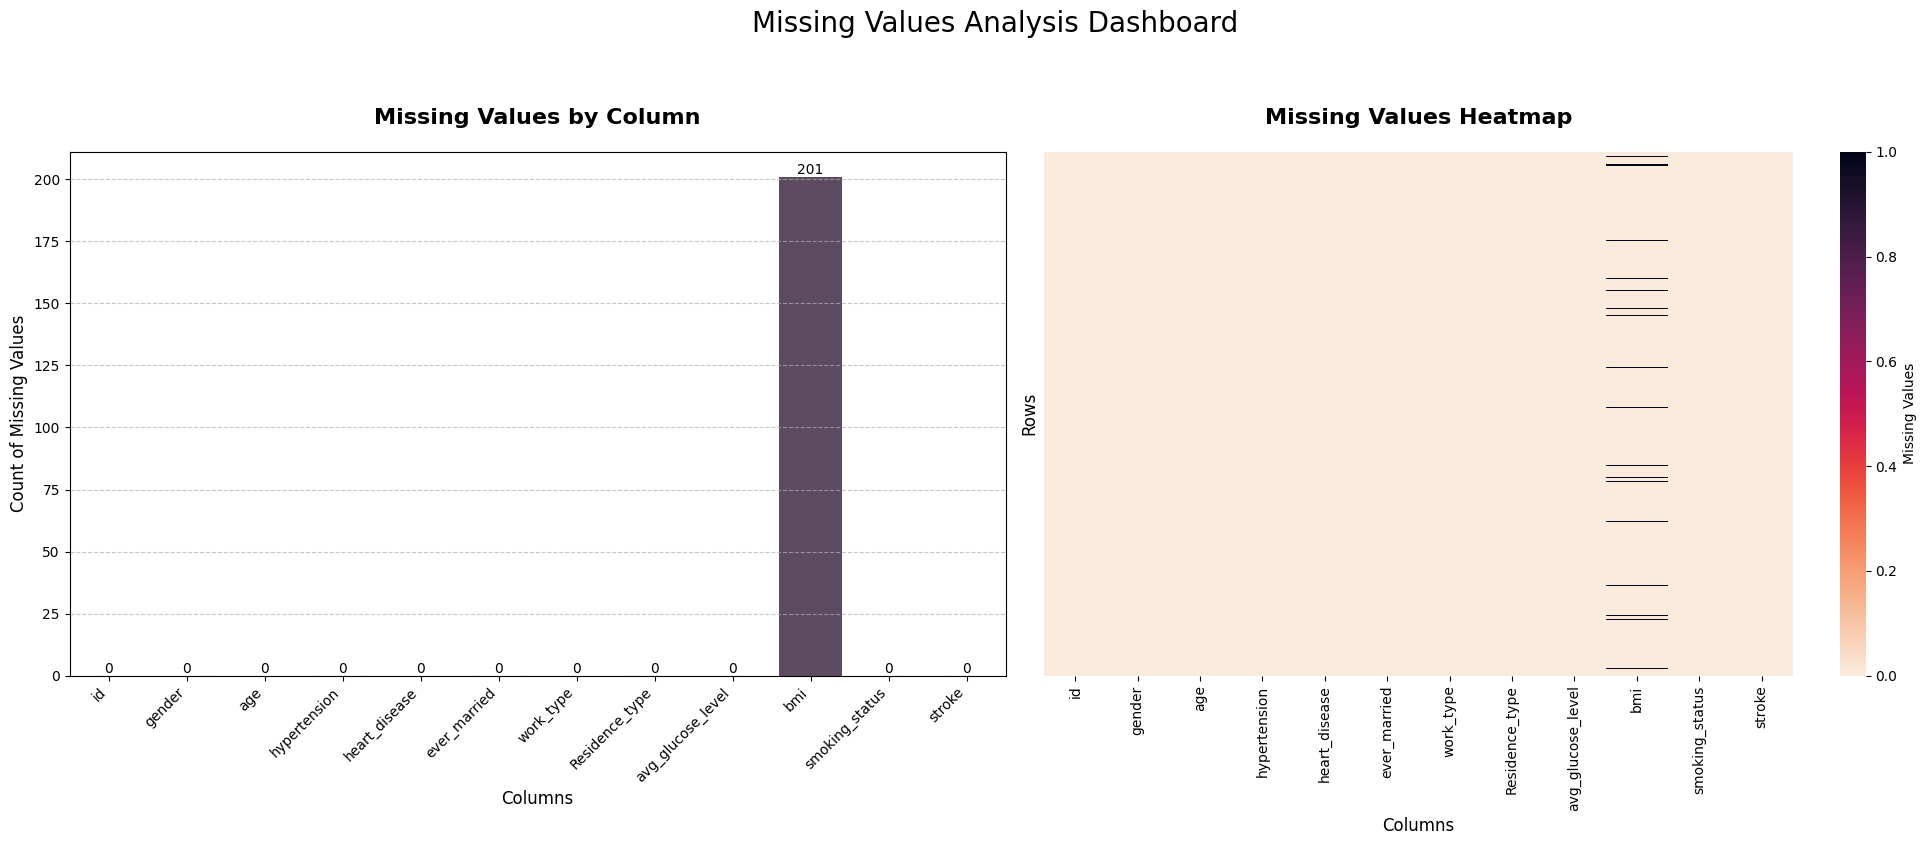

In [8]:
fig = plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
missing_values = df.isnull().sum()
ax = sns.barplot(x=missing_values.index, y=missing_values.values, alpha=0.8, color='#35193e')
plt.title('Missing Values by Column', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Count of Missing Values', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(missing_values.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.heatmap(df.isnull(), 
            cmap='rocket_r',
            yticklabels=False,
            cbar_kws={'label': 'Missing Values'})
plt.title('Missing Values Heatmap', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)

plt.suptitle('Missing Values Analysis Dashboard', fontsize=20, y=1.05)
plt.tight_layout()

plt.show()

---

🔴 Eksik Veri Tespiti (Missing Value)

- Tek missing value yalnızca BMI sütununda tespit edilmiştir.
- Bu eksik değerler, heatmap ve msgno ile görselleştirilmiştir.

---

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Data Cleaning: 
</span>

- Handle missing values.

- Check for duplicates and remove them if found.

- Standardize column names (if necessary) for consistent naming conventions.

- Validate data types and convert columns to appropriate types if needed.

In [9]:
df.columns = df.columns.str.title()
df.columns

Index(['Id', 'Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'Bmi',
       'Smoking_Status', 'Stroke'],
      dtype='object')

In [10]:
df.rename(columns={'Bmi': 'BMI', 'Id': 'ID'}, inplace=True)
df.columns

Index(['ID', 'Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'BMI',
       'Smoking_Status', 'Stroke'],
      dtype='object')

In [11]:
df.dtypes

ID                     int64
Gender                object
Age                  float64
Hypertension           int64
Heart_Disease          int64
Ever_Married          object
Work_Type             object
Residence_Type        object
Avg_Glucose_Level    float64
BMI                  float64
Smoking_Status        object
Stroke                 int64
dtype: object

In [12]:
def categorize_age(age):
    if age >= 0 and age <= 1:
        return 'Infant'
    elif age >1 and age <= 3:
        return 'Toddler'
    elif age >3 and age <= 6:
        return 'Preschooler'
    elif age > 6 and age <= 12:
        return 'School Age'
    elif age > 12 and age < 20:
        return 'Teenager'
    elif age >= 20 and age <= 24:
        return 'Adolescense'
    elif age > 24 and age <= 39:
        return 'Adult'
    elif age > 39 and age <= 59:
        return 'Middle Aged'
    else:
        return 'Senior'

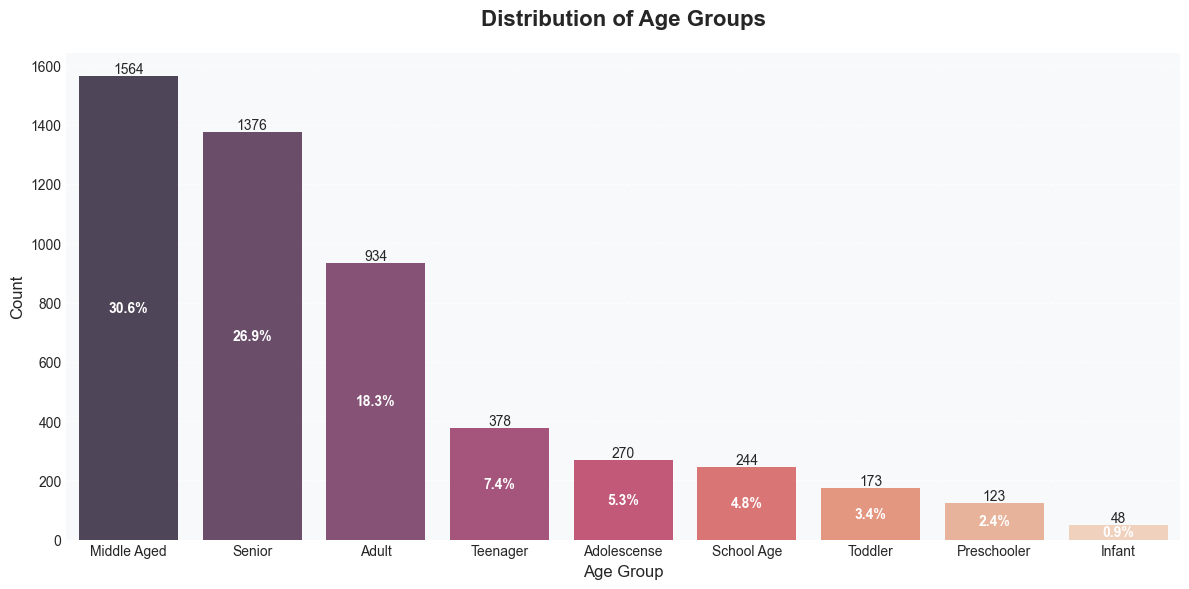

In [13]:
df['Age_Group'] = df['Age'].apply(categorize_age)

plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(12, 6))

age_counts = df['Age_Group'].value_counts()
ax = sns.barplot(x=age_counts.index, 
                 y=age_counts.values,
                 palette='rocket',
                 alpha=0.8)

plt.title('Distribution of Age Groups', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, v in enumerate(age_counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7)


plt.xticks(rotation=0)


ax.set_facecolor('#f8f9fa')


total = age_counts.sum()
for i, v in enumerate(age_counts.values):
    percentage = (v/total) * 100
    ax.text(i, v/2, f'{percentage:.1f}%', 
            ha='center', 
            va='center',
            color='white',
            fontweight='bold')

plt.tight_layout()

plt.show()

---

🔢 Yaş Grupları Oluşturulması

- Data içinde farklı yaş grupları olduğundan, daha detaylı analiz yapılabilmesi için yeni bir sütun/değişken oluşturulmuştur.
- Yeni oluşturduğumuz Age Group sütunu, grafik üzerinde gösterilmiştir. 📊

---

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df = df[df['Gender'] != 'Other']

In [16]:
df.Gender.value_counts()

Gender
Female    2994
Male      2115
Name: count, dtype: int64

---

🚨 Veri Temizliği ve Düzenleme

- Gender sütununda tek bir değerin "Other" olduğunu tespit ettik.
- Bu sebeple, ilgili satırı verimizden sildik.
- Sonraki analizlerin daha anlamlı ve doğru olabilmesi için bu düzenlemeyi yaptık. 🔧📊

---

### Missing Value

In [17]:
df.isnull().sum()

ID                     0
Gender                 0
Age                    0
Hypertension           0
Heart_Disease          0
Ever_Married           0
Work_Type              0
Residence_Type         0
Avg_Glucose_Level      0
BMI                  201
Smoking_Status         0
Stroke                 0
Age_Group              0
dtype: int64

In [18]:
df[df['BMI'] >=45]

ID  Gender   Age  Hypertension  Heart_Disease Ever_Married  \
21    13861  Female  52.0             1              0          Yes   
66    17004  Female  70.0             0              0          Yes   
79    42117    Male  43.0             0              0          Yes   
113   41069  Female  45.0             0              0          Yes   
163   20426  Female  78.0             1              0           No   
...     ...     ...   ...           ...            ...          ...   
4976  63656  Female  18.0             0              0           No   
5009  40732  Female  50.0             0              0          Yes   
5015  50140  Female  44.0             0              0          Yes   
5057  38349  Female  49.0             0              0          Yes   
5103  22127  Female  18.0             0              0           No   

          Work_Type Residence_Type  Avg_Glucose_Level   BMI   Smoking_Status  \
21    Self-employed          Urban             233.29  48.9     never smoked   
66          Private          Urban             221.58  47.5     never smoked   
79    Self-employed          Urban             143.43  45.9          Unknown   
113         Private          Rural             224.10  56.6     never smoked   
163         Private          Urban             203.87  45.7     never smoked   
...             ...            ...                ...   ...              ...   
4976        Private          Urban             101.95  46.0  formerly smoked   
5009  Self-employed          Rural             126.85  49.5  formerly smoked   
5015       Govt_job          Rural             133.24  45.0           smokes   
5057       Govt_job          Urban              69.92  47.6     never smoked   
5103        Private          Urban              82.85  46.9          Unknown   

      Stroke    Age_Group  
21         1  Middle Aged  
66         1       Senior  
79         1  Middle Aged  
113        1  Middle Aged  
163        1       Senior  
...      ...          ...  
4976       0     Teenager  
5009       0  Middle Aged  
5015       0  Middle Aged  
5057       0  Middle Aged  
5103       0     Teenager  

[160 rows x 13 columns]

In [19]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

x = Q1 - 3 * IQR
y = Q3 + 3 * IQR

outliers = df[(df['BMI'] < x) | (df['BMI'] > y)]
outliers

ID  Gender   Age  Hypertension  Heart_Disease Ever_Married  \
358   66333    Male  52.0             0              0          Yes   
544     545    Male  42.0             0              0          Yes   
928   41097  Female  23.0             1              0           No   
1559  37759  Female  53.0             0              0          Yes   
2128  56420    Male  17.0             1              0           No   
2764  20292  Female  24.0             0              0          Yes   
4188  70670  Female  27.0             0              0          Yes   
4209  51856    Male  38.0             1              0          Yes   

          Work_Type Residence_Type  Avg_Glucose_Level   BMI Smoking_Status  \
358   Self-employed          Urban              78.40  64.8   never smoked   
544         Private          Rural             210.48  71.9   never smoked   
928         Private          Urban              70.03  78.0         smokes   
1559        Private          Rural              72.63  66.8        Unknown   
2128        Private          Rural              61.67  97.6        Unknown   
2764        Private          Urban              85.55  63.3   never smoked   
4188        Private          Rural              57.96  64.4   never smoked   
4209        Private          Rural              56.90  92.0   never smoked   

      Stroke    Age_Group  
358        0  Middle Aged  
544        0  Middle Aged  
928        0  Adolescense  
1559       0  Middle Aged  
2128       0     Teenager  
2764       0  Adolescense  
4188       0        Adult  
4209       0        Adult

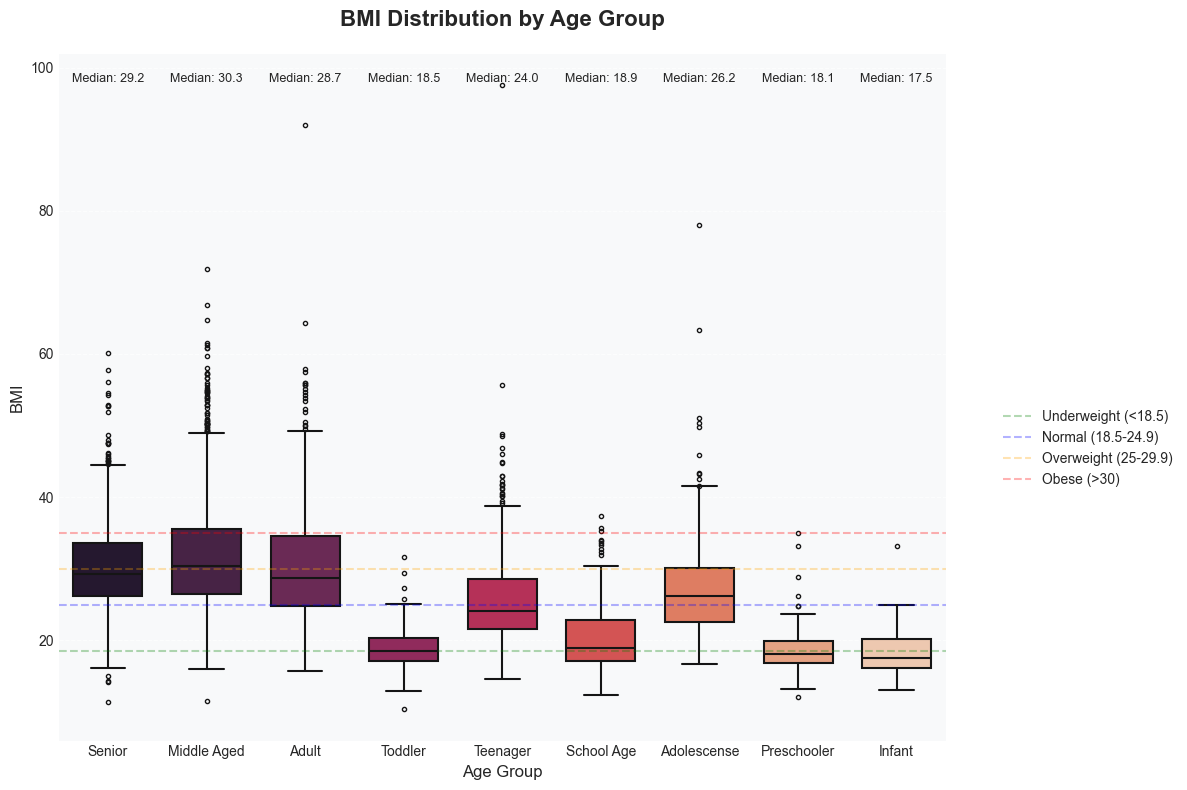

In [20]:
plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(12, 8))


ax = sns.boxplot(data=df,
                 x='Age_Group',
                 y='BMI',
                 palette='rocket',
                 width=0.7,
                 fliersize=3,
                 linewidth=1.5)


plt.title('BMI Distribution by Age Group', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('BMI', fontsize=12)

ax.set_facecolor('#f8f9fa')

ax.grid(axis='y', linestyle='--', alpha=0.7)


for i in range(len(df['Age_Group'].unique())):
    age_group = df['Age_Group'].unique()[i]
    median = df[df['Age_Group'] == age_group]['BMI'].median()
    ax.text(i, df['BMI'].max(), f'Median: {median:.1f}', 
            ha='center', va='bottom', fontsize=9)

plt.axhline(y=18.5, color='green', linestyle='--', alpha=0.3, label='Underweight (<18.5)')
plt.axhline(y=24.9, color='blue', linestyle='--', alpha=0.3, label='Normal (18.5-24.9)')
plt.axhline(y=29.9, color='orange', linestyle='--', alpha=0.3, label='Overweight (25-29.9)')
plt.axhline(y=34.9, color='red', linestyle='--', alpha=0.3, label='Obese (>30)')

plt.legend(bbox_to_anchor=(1.05, 0.5), loc='upper left')

plt.tight_layout()

plt.show()

🧮 Missing Value Doldurma Aşaması

- Age Group'lara ait BMI dağılımlarını gözlemledik ve değişkenlik olduğunu fark ettik.
- Bu sebeple, missing value doldurma işlemini her bir age group özelinde yapmaya karar verdik. 🔄

----

In [21]:
bmi_avg_value = df.groupby(['Age_Group', 'Gender'])['BMI'].median().reset_index()

In [22]:
bmi_avg_value

Age_Group  Gender    BMI
0   Adolescense  Female  26.50
1   Adolescense    Male  25.75
2         Adult  Female  28.10
3         Adult    Male  29.90
4        Infant  Female  17.35
5        Infant    Male  18.30
6   Middle Aged  Female  29.80
7   Middle Aged    Male  30.80
8   Preschooler  Female  17.95
9   Preschooler    Male  18.10
10   School Age  Female  18.90
11   School Age    Male  18.80
12       Senior  Female  29.20
13       Senior    Male  29.40
14     Teenager  Female  24.15
15     Teenager    Male  23.95
16      Toddler  Female  18.10
17      Toddler    Male  18.90

In [23]:
df['BMI'] = df['BMI'].fillna(df.groupby(['Gender', 'Age_Group'])['BMI'].transform('median'))

In [24]:
df['BMI'].isnull().sum()

np.int64(0)

In [25]:
def categorize_BMI(bmi):
    if bmi  < 18.5:
        return 'Underweight'
    elif 18.5<= bmi <= 24.9:
        return 'Normal Weight'
    elif 24.9< bmi <= 29.9:
        return 'Overweight'
    elif 29.9< bmi <= 34.9:
        return 'Moderately Obese'
    elif 34.9< bmi <= 40:
        return 'Severely Obese'
    else:
        return 'Extreme Obese'

In [26]:
df['BMI_Group'] = df['BMI'].apply(categorize_BMI)

## BMI Değerlerine Dayalı Gruplandırma Çalışması 🏋️‍♀️📊

- Bu çalışmada, **BMI** değerlerine dayalı olarak bireyleri **DSÖ'nün (Dünya Sağlık Örgütü)** belirlediği sınıflandırmalara göre gruplandırmak amacıyla bir "**BMI_Group**" sütunu oluşturulmuştur. 📝

- Bu sütun, veriyi daha detaylı analiz edebilmek, **BMI ile ilişkili sağlık göstergeleri** üzerinde derinlemesine inceleme yapabilmek için kullanılmıştır. 💪

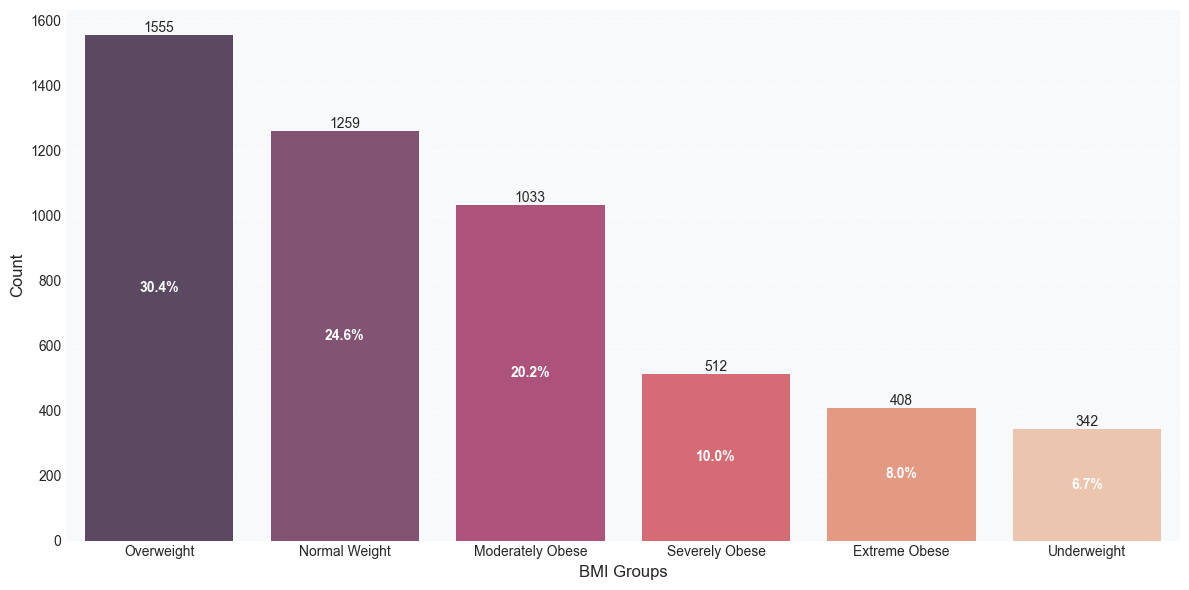

In [27]:
plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(12, 6))

bmi_counts = df['BMI_Group'].value_counts()
ax = sns.barplot(x=bmi_counts.index, 
                 y=bmi_counts.values,
                 palette='rocket',
                 alpha=0.8)

plt.xlabel('BMI Groups', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, v in enumerate(bmi_counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7)


plt.xticks(rotation=0)


ax.set_facecolor('#f8f9fa')


total = bmi_counts.sum()
for i, v in enumerate(bmi_counts.values):
    percentage = (v/total) * 100
    ax.text(i, v/2, f'{percentage:.1f}%', 
            ha='center', 
            va='center',
            color='white',
            fontweight='bold')

plt.tight_layout()

plt.show()

# BMI Gruplarının Son Durumu 📊

Bu grafik, **missing value** doldurma işleminden sonra **BMI gruplarının** son durumunu göstermektedir. 

### Açıklamalar:
- Grafik, veri setindeki eksik değerlerin doldurulmasının ardından, her bir BMI grubundaki değişiklikleri ve dağılımları görselleştirmektedir.
- Bu işlem, veri setinin daha doğru ve güvenilir hale gelmesini sağlamaktadır.

In [28]:
df['Glucose_Level_Group'] = pd.cut(df['Avg_Glucose_Level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

## Glikoz Düzeylerine Dayalı Gruplandırma Çalışması 🍬📊

- Bu çalışmada, **glikoz düzeylerine** (**glucose level**) dayalı olarak bireyleri analiz etmek amacıyla bir "**Glucose_Level_Group**" sütunu oluşturulmuştur. 📝

- Bu sütun, veriyi daha detaylı analiz edebilmek, **glikoz düzeyi ile ilişkili sağlık göstergeleri** üzerinde derinlemesine inceleme yapabilmek için kullanılmıştır. 💉💪

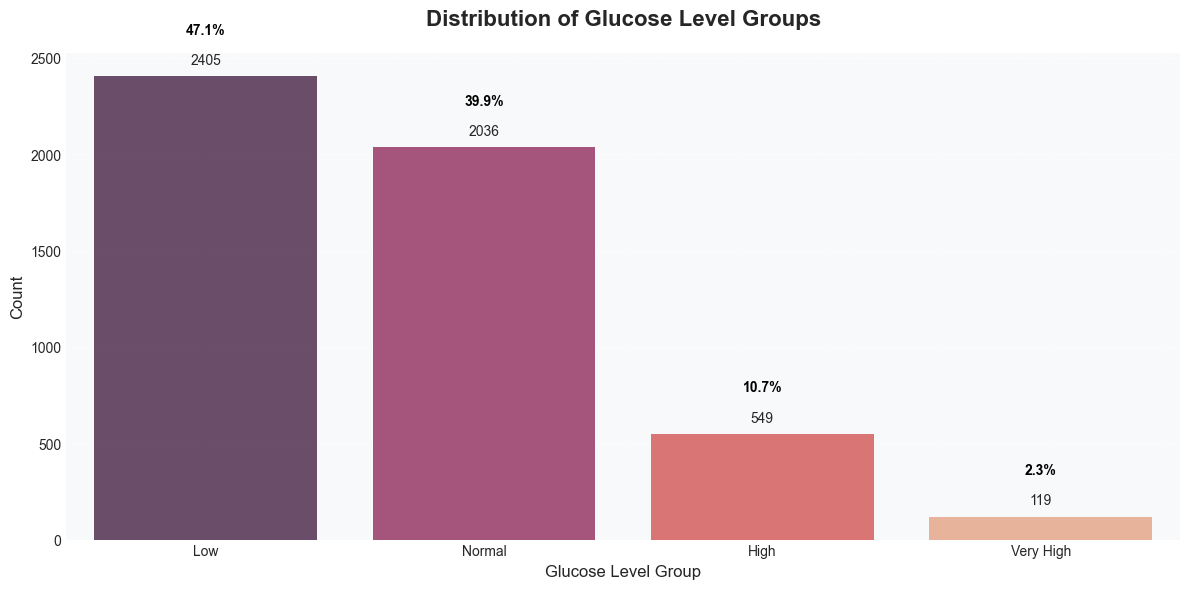

In [29]:
plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(12, 6))

glc_counts = df['Glucose_Level_Group'].value_counts()

ax = sns.barplot(x=glc_counts.index, 
                 y=glc_counts.values,
                 palette='rocket',
                 alpha=0.8)

plt.title('Distribution of Glucose Level Groups', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Glucose Level Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, v in enumerate(glc_counts.values):
    ax.text(i, v + 0.02 * glc_counts.max(), str(v), ha='center', va='bottom', fontsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=0)

ax.set_facecolor('#f8f9fa')

total = glc_counts.sum()
for i, v in enumerate(glc_counts.values):
    percentage = (v/total) * 100

    ax.text(i, v + 0.1 * glc_counts.max(), f'{percentage:.1f}%', 
            ha='center', 
            va='center',
            color='black',
            fontweight='bold')

plt.tight_layout()

plt.show()

## Glikoz Seviyeleri Analizi 🍬📊

Bu çalışmada, glikoz düzeylerine göre bireylerin sınıflandırılması yapılmış ve her bir kategoriye ait oranlar belirlenmiştir:

- **Düşük Glikoz Seviyesi** (Low): %47.1 🍂
- **Normal Glikoz Seviyesi** (Normal): %39.9 ⚖️
- **Yüksek Glikoz Seviyesi** (High): %10.7 🚨
- **Çok Yüksek Glikoz Seviyesi** (Very High): %2.3 🔴

### Analiz:

- **Düşük Glikoz Seviyesi (Low)**: Bireylerin %47.1'i düşük glikoz seviyelerine sahiptir. Bu grup, genellikle hipoglisemi riski taşıyan bireylerden oluşur. Düşük glikoz seviyeleri, enerji eksikliklerine ve çeşitli sağlık sorunlarına yol açabilir.
  
- **Normal Glikoz Seviyesi (Normal)**: %39.9'u normal glikoz seviyelerine sahiptir, bu da sağlıklı bireylerin büyük kısmını temsil eder. Normal seviyeler, metabolizma ve vücut fonksiyonlarının düzgün işlediğini gösterir.

- **Yüksek Glikoz Seviyesi (High)**: %10.7'si yüksek glikoz seviyelerine sahiptir. Bu bireyler, prediyabet ya da diyabet riski taşıyor olabilirler. Bu seviyede, glikozun düzenli izlenmesi ve kontrol altına alınması önemlidir.

- **Çok Yüksek Glikoz Seviyesi (Very High)**: %2.3'ü çok yüksek glikoz seviyelerine sahiptir. Bu durum, genellikle diyabet hastalığının daha ileri evrelerine işaret eder ve acil müdahale gerektirebilir.

Bu oranlar, toplumdaki glikoz düzeylerinin büyük bir kısmının normal olduğunu ancak önemli bir kısmının da yüksek ve çok yüksek glikoz seviyelerine sahip olduğunu göstermektedir. Bu tür analizler, glikoz düzeylerinin sağlık üzerindeki etkilerini anlamak ve önleyici tedbirler almak için faydalıdır.

---

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Analysis Goal
</span>

<div class="alert alert-block alert-success">

### <span style=" color:red"> How does age influence stroke occurrence?
</span>

In [30]:
stroke_positive = df[df['Stroke'] == 1]
stroke_negative = df[df['Stroke'] == 0]

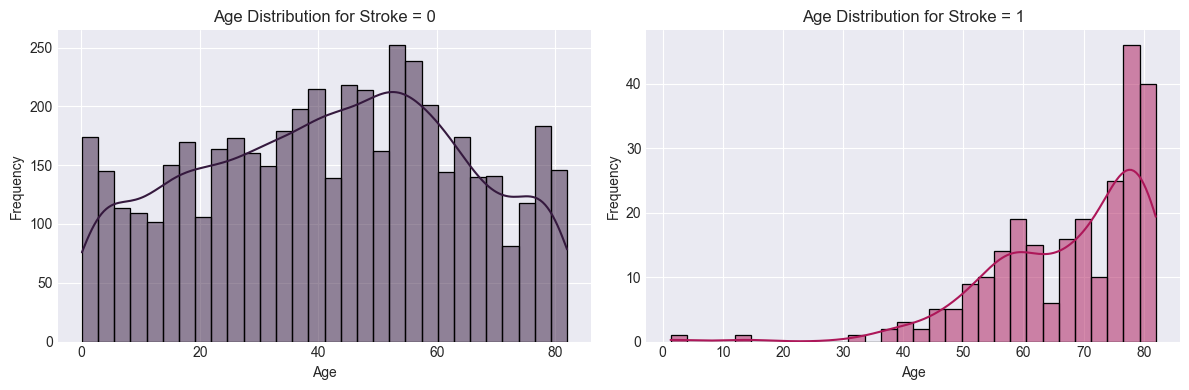

In [31]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=stroke_negative, x='Age', bins=30, kde=True, color='#35193e', ax=axes[0])
axes[0].set_title('Age Distribution for Stroke = 0')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

sns.histplot(data=stroke_positive, x='Age', bins=30, kde=True, color='#ad1759', ax=axes[1])
axes[1].set_title('Age Distribution for Stroke = 1')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

📈 İnme Vakaları ve Yaş Dağılımı 🧠
Ana Bulgular
🔵 İnme Vakalarının İleri Yaşlarda Yoğunlaşması

İnme vakaları, 45 yaş civarında belirgin bir artış gösterir ve 80 yaş civarında zirveye ulaşır.
Pozitif çarpıklık (skewness), yaşlı bireylerde daha yüksek bir inme vakası sıklığına işaret etmektedir.
75-80 yaş aralığı, en yüksek inme pozitif prevalansına sahip olup, yaşlanmanın inme riski üzerindeki etkisini güçlü bir şekilde vurgular.
🟢 Genç Nüfusta İnme Vakalarının Nadirliği

40 yaş altındaki bireylerde, özellikle 30 yaşın altındaki bireylerde inme vakaları son derece nadirdir.
Bu durum, genç nüfusun inme riski açısından önemli ölçüde daha düşük bir olasılığa sahip olduğunu göstermektedir.
Yoğunluk Eğrisi ve Histogram
📊 Histogramı tamamlayan yoğunluk eğrisi, inme vakalarının yaşa bağlı dağılımını destekler.
Eğri, yaş ilerledikçe inme olasılığında kademeli bir artış olduğunu gösterir ve 70 yaş ve üzerindeki bireylerde zirveye ulaşır.

- Sonuç ve Öneriler
✅ Yaş, inme riskinin önemli bir belirleyicisidir.

50 yaş ve üzerindeki bireylerde inme prevalansı keskin bir şekilde artış gösterir.

🏥 Orta yaşlı ve yaşlı nüfus için önleyici tedbirler ve müdahaleler büyük önem taşır.

🔍 İnme negatif grubu (Stroke = 0) için grafik üzerinde belirgin bir eğilim görülmemiştir, bu nedenle bu kategoriye ilişkin özel çıkarımlar yapmak zordur.



---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Do body mass index (BMI) and glucose levels jointly or independently increase stroke risk?
</span>

In [32]:
stroke_negative = df[df['Stroke'] == 0]
stroke_positive = df[df['Stroke'] == 1]
correlation_positive = stroke_positive[['BMI', 'Avg_Glucose_Level']].corr()
correlation_negative = stroke_negative[['BMI', 'Avg_Glucose_Level']].corr()


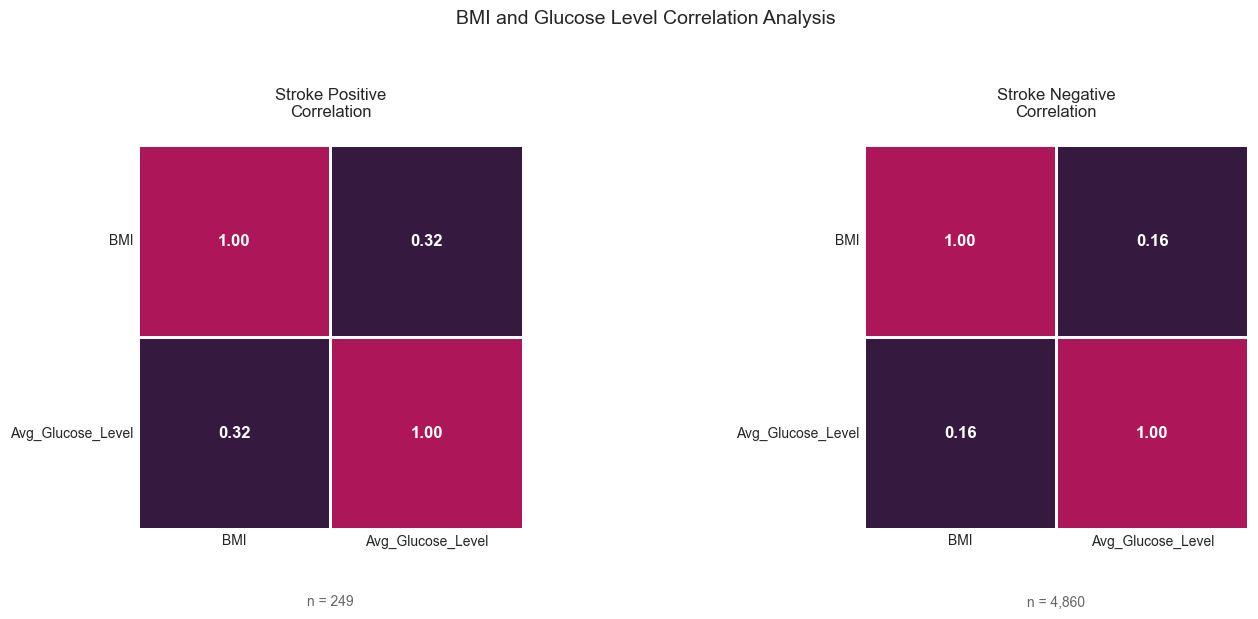

In [33]:
# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Custom dark purple and rose red colormap
dark_purple_rose_red_cmap = sns.color_palette(["#35193e", "#ad1759"], as_cmap=True)

# First heatmap (Positive cases)
sns.heatmap(correlation_positive, 
            annot=True,
            cmap=dark_purple_rose_red_cmap,
            fmt='.2f',
            square=True,
            cbar=False,
            ax=ax1,
            annot_kws={'size': 12, 'weight': 'bold'},
            linewidths=2,
            linecolor='white')

ax1.set_title('Stroke Positive\nCorrelation', 
              pad=20, 
              fontsize=12, 
              fontweight='light',
              family='sans-serif')

# Second heatmap (Negative cases)
sns.heatmap(correlation_negative, 
            annot=True,
            cmap=dark_purple_rose_red_cmap,
            fmt='.2f',
            square=True,
            cbar=False,
            ax=ax2,
            annot_kws={'size': 12, 'weight': 'bold'},
            linewidths=2,
            linecolor='white')

ax2.set_title('Stroke Negative\nCorrelation', 
              pad=20, 
              fontsize=12, 
              fontweight='light',
              family='sans-serif')

# Add minimal sample size information
for ax, data, title in [(ax1, stroke_positive, 'Positive'), 
                        (ax2, stroke_negative, 'Negative')]:
    ax.text(0.5, -0.2, 
            f'n = {len(data):,}', 
            transform=ax.transAxes, 
            fontsize=10,
            ha='center',
            color='#666666')
    
    # Clean up axes
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Add subtle main title
plt.suptitle('BMI and Glucose Level Correlation Analysis', 
             fontsize=14, 
             fontweight='light', 
             y=1.05,
             family='sans-serif')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Glikoz ve BMI Arasındaki Korelasyon Analizi 🧠📊

### Genel Bulgular:

- **Genel Korelasyon**: Glikoz ve BMI arasındaki korelasyon genel anlamda **düşüktür**. Bu, glikoz seviyeleri ile vücut kitle indeksi (BMI) arasında doğrudan bir ilişki bulunmadığını gösteriyor. Yani, glikoz düzeyleri ile BMI arasında güçlü bir bağ kurulamamıştır.

### Stroke Pozitif ve Negatif Kategorileri:

- **Stroke Negatifler**: Stroke geçirmemiş bireyler için, glikoz ve BMI arasındaki korelasyon **çok düşüktür**. Bu, glikoz seviyeleri ile BMI arasında önemli bir ilişki olmadığı anlamına gelir.

- **Stroke Pozitifler**: Ancak, **stroke geçiren bireyler** için bu korelasyon **iki katına çıkmıştır**. Yani, stroke geçiren bireylerde glikoz seviyeleri ile BMI arasında daha belirgin bir ilişki gözlemlenmiştir. Bu, sağlık durumunun ve diğer faktörlerin glikoz ile BMI arasındaki ilişkiyi etkileyebileceğini gösteriyor.

### Sonuç:

Glikoz ve BMI arasındaki ilişki, stroke durumu gibi sağlık faktörlerine bağlı olarak değişebilmektedir. Stroke geçiren bireylerde bu iki değişken arasındaki ilişki daha belirgin hale gelirken, stroke geçirmeyenlerde bu ilişki daha zayıf kalmaktadır.

---

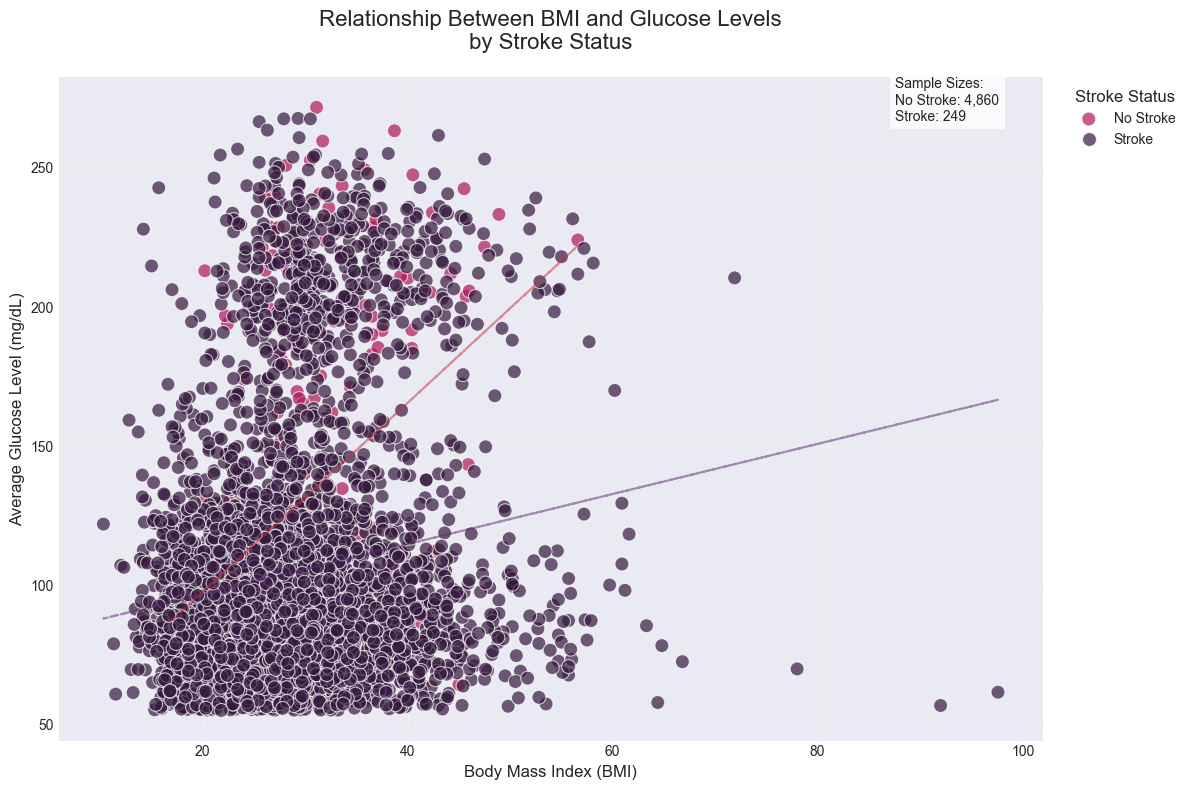

In [34]:
plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(
    data=df,
    x='BMI',
    y='Avg_Glucose_Level',
    hue='Stroke',
    alpha=0.7,
    s=100, 
    palette={0: '#35193e', 1: '#ad1759'},  
    legend='brief'
)

for stroke_status in [0, 1]:
    mask = df['Stroke'] == stroke_status
    x = df[mask]['BMI']
    y = df[mask]['Avg_Glucose_Level']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), 
             linestyle='--', 
             alpha=0.5, 
             color='#5A2A6C' if stroke_status == 0 else '#C72C41')

plt.title('Relationship Between BMI and Glucose Levels\nby Stroke Status', 
         fontsize=16, 
         pad=20,
         fontweight='light',
         family='sans-serif')

plt.xlabel('Body Mass Index (BMI)', 
          fontsize=12, 
          fontweight='light')
plt.ylabel('Average Glucose Level (mg/dL)', 
          fontsize=12, 
          fontweight='light')

legend = plt.legend(title='Stroke Status',
                   labels=['No Stroke', 'Stroke'],
                   title_fontsize=12,
                   fontsize=10,
                   bbox_to_anchor=(1.02, 1),
                   loc='upper left')
legend.get_frame().set_alpha(0.9)
legend.get_frame().set_edgecolor('white')

plt.grid(True, linestyle='--', alpha=0.3)

stroke_counts = df['Stroke'].value_counts()
plt.text(0.85, 1, 
         f'Sample Sizes:\nNo Stroke: {stroke_counts[0]:,}\nStroke: {stroke_counts[1]:,}',
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

scatter.spines['top'].set_visible(False)
scatter.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

## BMI, Glikoz Seviyeleri ve İnme Riski Arasındaki İlişki 🧠🍬

Saçılım grafiği, **Vücut Kitle İndeksi (BMI)**, **glikoz seviyeleri** ve **inme riski** arasındaki ilişkiyi göstermektedir:

### İnme Vakaları (Kırmızı Noktalar) 🔴:
- **Yüksek Glikoz Seviyeleri**: Yüksek glikoz seviyeleri, inme vakalarıyla güçlü bir ilişki göstermekte olup **önemli bir risk faktörüne** işaret etmektedir.
- **BMI ile İnme İlişkisi**: BMI ile inme arasındaki ilişki daha dağınık bir görünüm sergilemekle birlikte, yüksek BMI değerleri bazı durumlarda **risk faktörü** olarak katkı sağlayabilir.

### İnme Olmayan Vakalar (Mavi Noktalar) 🔵:
- **Eşit Dağılım**: Bu vakalar, **BMI ve glikoz seviyeleri** genelinde daha eşit bir şekilde dağılmaktadır.

### Gözlemler:
- **Glikoz Seviyeleri**: Yüksek glikoz seviyeleri, bağımsız bir şekilde **inme olasılığını artırıyor** gibi görünmekte ve bu durum, glikozun **önemli bir risk faktörü** olduğunu ortaya koymaktadır.
- **BMI**: BMI'nin etkisi daha az belirgin olmakla birlikte, yüksek glikoz seviyeleriyle bir araya geldiğinde **etkisini artırıcı** bir rol oynayabilir.

Bu analiz, glikoz seviyelerinin inme riski üzerindeki güçlü etkisini ve BMI ile birleştiğinde riski nasıl artırabileceğini vurgulamaktadır. Grafik üzerinden daha detaylı incelemeler yapılarak, bu ilişkilerin sağlık üzerindeki etkileri daha iyi anlaşılabilir.

---

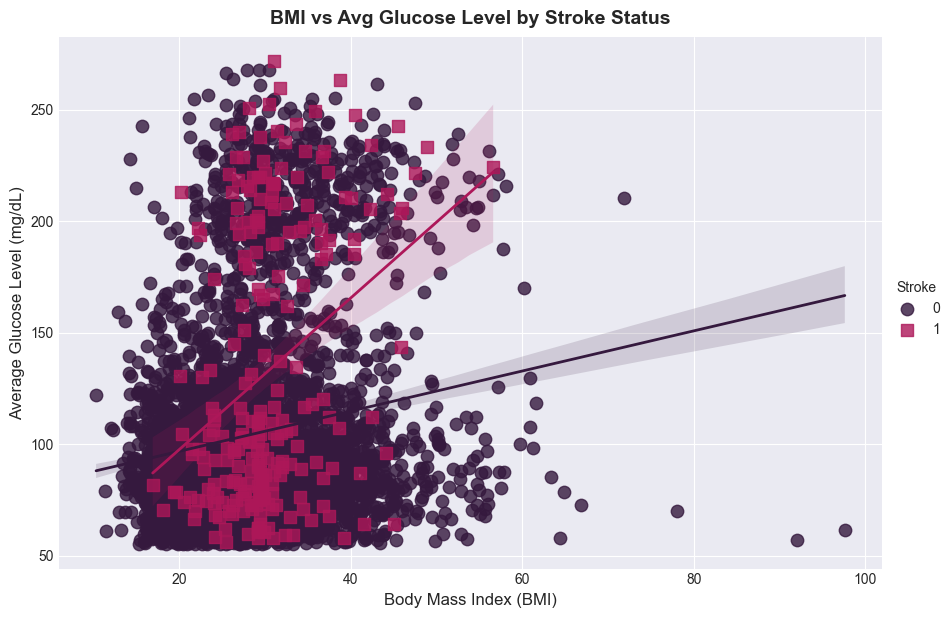

In [35]:
palette = {0: '#35193e', 1: '#ad1759'}

g = sns.lmplot(
    data=df,
    x='BMI',
    y='Avg_Glucose_Level',
    hue='Stroke',
    height=6,
    aspect=1.5,
    markers=['o', 's'],
    palette=palette,
    scatter_kws={'s': 80, 'alpha': 0.8}, 
    line_kws={'linewidth': 2}            
)

g.set_axis_labels("Body Mass Index (BMI)", "Average Glucose Level (mg/dL)", fontsize=12)
g.fig.suptitle("BMI vs Avg Glucose Level by Stroke Status", y=1.02, fontsize=14, weight='bold')

plt.show()

## Regresyon Çizgileri ve İnme Riski Arasındaki İlişki 📉🧠

Regresyon çizgileri, **inme geçiren** ve **geçirmeyen bireyler** için farklı eğilimler göstermektedir:

### İnme Vakaları (Stroke = 1) 🔴:
- **Daha Dik Pozitif Eğilim**: İnme geçiren bireyler için regresyon çizgisi daha dik bir **pozitif eğime** sahiptir. Bu durum, **yüksek BMI** ve **yüksek glikoz seviyelerinin** inme oluşumu ile daha güçlü bir ilişki gösterdiğini ortaya koymaktadır.
- **Çok Yüksek Değerler**: Çok yüksek BMI ve glikoz seviyelerine sahip bireylerin (grafiğin sağ üst köşesi) **Stroke = 1** grubunda daha yoğun olarak yer aldığı gözlemlenmektedir. Bu, bu faktörlerin birlikte inme riskini artırdığı hipotezini desteklemektedir.

### İnme Olmayan Vakalar (Stroke = 0) 🔵:
- **Daha Hafif Eğilim**: İnme geçirmeyen bireyler için regresyon çizgisi daha **hafif bir eğime** sahiptir. Bu da **BMI**, **glikoz seviyeleri** ve inme olmaması arasındaki ilişkinin daha zayıf olduğunu göstermektedir.

### Düşük Değerlerdeki Gözlemler 🌱:
- **Düşük BMI ve Glikoz Seviyeleri**: Düşük BMI ve glikoz seviyelerinde (grafiğin sol alt köşesi), iki grup arasında (Stroke = 0 ve Stroke = 1) **önemli bir örtüşme** bulunmaktadır. Bu durum, bu faktörlerin düşük seviyelerde, bağımsız ya da birlikte inme riski üzerinde güçlü bir etkiye sahip olmayabileceğini göstermektedir.

### Aykırı Değerler ⚠️:
- **Aşırı Yüksek Değerler**: Her iki grupta da aşırı yüksek BMI ve/veya glikoz seviyelerine sahip birkaç **aykırı değer** bulunmaktadır. Bu vakaların analize olan etkisini anlamak için daha fazla **araştırma yapılması gerekebilir**.

### Sonuç:
- **Daha Dik Regresyon Çizgisi**: **Stroke = 1** için regresyon çizgisinin daha dik olması, **BMI ve glikoz seviyelerinin birlikte** (birleşik olarak) inme riski ile daha güçlü bir ilişkiye sahip olduğunu göstermektedir. Bu, bu faktörlerin birlikte **kritik risk faktörleri** olarak önemini vurgulamaktadır.

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Can smoking increase the likelihood of stroke?
</span>

In [36]:
df['Smoking_Status'].value_counts()

Smoking_Status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

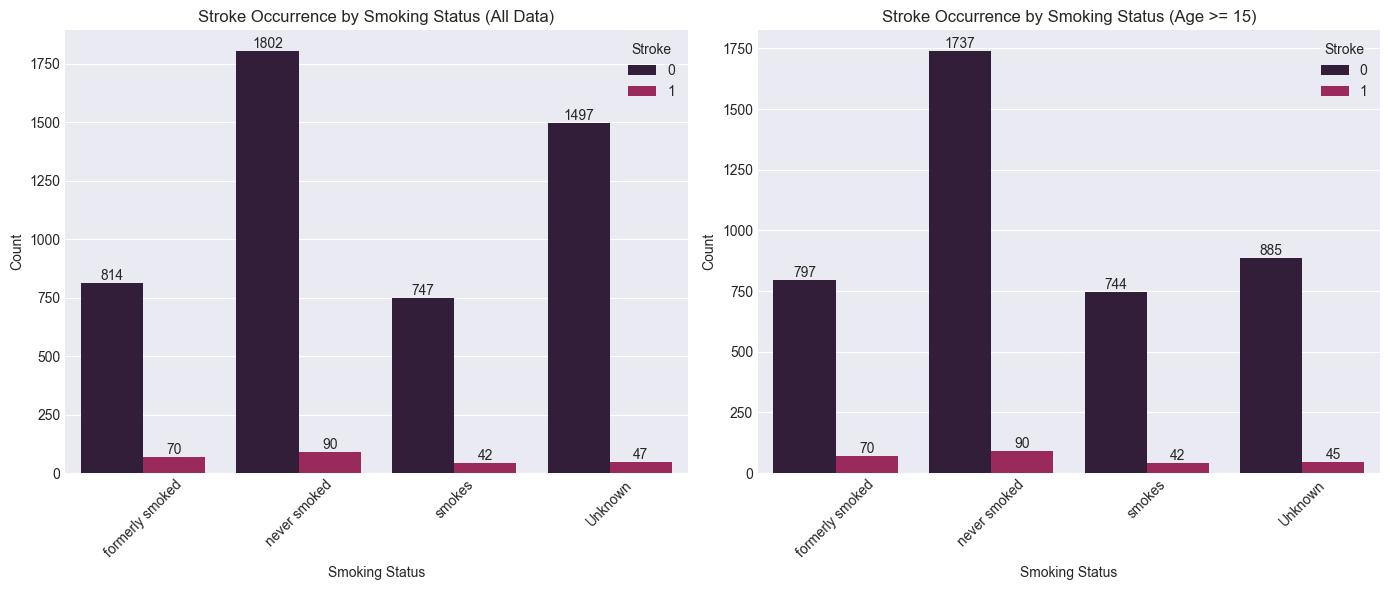

In [37]:
df_filtered = df[df['Age'] >= 15]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

palette = {0: '#35193e', 1: '#ad1759'} 

sns.countplot(data=df, x='Smoking_Status', hue='Stroke', ax=axes[0], palette=palette)
axes[0].set_title('Stroke Occurrence by Smoking Status (All Data)')
axes[0].set_xlabel('Smoking Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d')

sns.countplot(data=df_filtered, x='Smoking_Status', hue='Stroke', ax=axes[1], palette=palette)
axes[1].set_title('Stroke Occurrence by Smoking Status (Age >= 15)')
axes[1].set_xlabel('Smoking Status')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d')

plt.tight_layout()

plt.show()

## Genel Karşılaştırma ve Yorum 🧠📊

### Popülasyon Değişimi:
- **15 Yaş Altı Bireyler Çıkarıldığında**: 
  - "Unknown" kategorisindeki bireylerin sayısında **ciddi bir düşüş** görülmektedir. Bu, yaş grubu kısıtlamasının veriler üzerindeki etkisini açıkça göstermektedir.
  - Diğer kategorilerde, özellikle "Formerly smoked" ve "Smokes" kategorilerinde, popülasyon daha **az etkilenmektedir**. Bu da yaş grubu kısıtlamasının bu kategorilerde daha az etkili olduğunu gösteriyor.

### İnme Oranları:
- **İnme Geçiren Bireyler**: 
  - Tüm kategorilerde inme yaşayan bireylerin sayısı **düşük** kalmaktadır. Bu, popülasyondaki inme vakalarının genel olarak sınırlı olduğunu gösteriyor.
  - Yaş grubu kısıtlaması uygulandığında, kategoriler arasında **ciddi bir farklılık** yaratılmamaktadır. Yani, yaş faktörü inme oranlarında önemli bir değişiklik oluşturmamaktadır.

### Sigara İçmeyenler ("Never smoked"):
- **En Büyük Popülasyon**: Hem tüm veri hem de **yaş ≥15** için, en büyük popülasyon **sigara içmeyenler** kategorisindedir. Bu, sigara içmemenin sağlık üzerindeki etkilerinin, özellikle inme ve diğer sağlık problemleri açısından önem taşıdığını göstermektedir.


---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Do individuals with heart disease face a higher stroke risk?
</span>

In [38]:
grouped = df.groupby('Heart_Disease')['Stroke'].mean().reset_index()

In [39]:
grouped

Heart_Disease    Stroke
0              0  0.041796
1              1  0.170290

In [40]:
df_grouped = df.groupby(['Heart_Disease', 'Stroke']).size().unstack(fill_value=0)

In [41]:
df_grouped_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

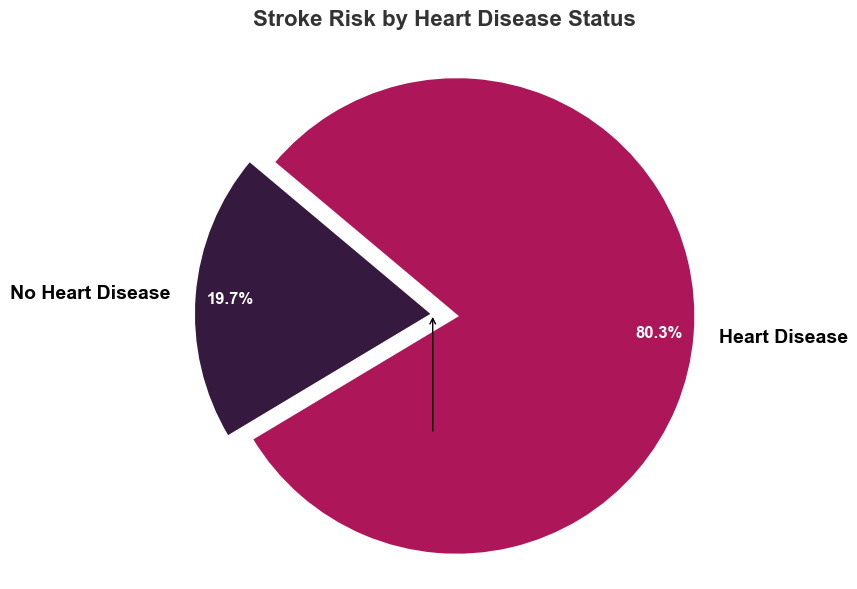

In [42]:
labels = ['No Heart Disease', 'Heart Disease']
sizes = df_grouped_percent[1]
colors = ['#35193e', '#ad1759']  
explode = [0, 0.1]  

fig, ax = plt.subplots(figsize=(8, 6)) 
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  
    startangle=140,  
    colors=colors,
    explode=explode,
    pctdistance=0.85,  
    wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'linestyle': 'solid'}  
)

plt.setp(autotexts, size=12, weight="bold", color='white')
plt.setp(texts, size=14, weight="bold", color='black')  
ax.set_title('Stroke Risk by Heart Disease Status', fontsize=16, weight='bold', color='#333333', pad=20)  

ax.annotate('', xy=(0, 0), xytext=(0, -0.5),
            arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=1))

ax.axis('equal')

plt.tight_layout()
plt.show()


## Kalp Hastalığı ve İnme Arasındaki İlişki 💓🧠

- **Kalp hastalığı olan bireylerde** %60 daha fazla **inme geçirme riski** bulunmaktadır.
  
- Bu, kalp hastalığı olan bireylerin inme riski **%300 artmış** demektir. 

- **Kalp hastalığı ile inme arasında güçlü bir bağlantı** olduğundan, özellikle kalp hastalığı olan bireylerin **düzenli sağlık kontrollerinden geçmesi** ve **önleyici tedbirlerin alınması** gereklidir.


---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Does work-related stress contribute to hypertension and subsequently to strokes?
</span>

In [43]:
grouped = df.groupby('Work_Type')[['Hypertension', 'Stroke']].mean() 

In [44]:
grouped

Hypertension    Stroke
Work_Type                            
Govt_job           0.111111  0.050228
Never_worked       0.000000  0.000000
Private            0.096101  0.050958
Self-employed      0.175824  0.079365
children           0.000000  0.002911

In [45]:
stress_analysis = round(df.groupby('Work_Type')[['Hypertension', 'Stroke']].mean() * 100,2)
stress_analysis = stress_analysis.rename(columns={'Hypertension': 'Hypertension Rate (%)', 'Stroke': 'Stroke Rate (%)'})


fig = px.imshow(stress_analysis.T,  
                labels={'x': 'Work Type', 'y': 'Indicator'},
                x=stress_analysis.index,  
                y=stress_analysis.columns,  
                color_continuous_scale=['#35193e', '#ad1759'], 
                color_continuous_midpoint=50,  
                title='High Blood Pressure and Stroke Rates by Job Type',
                text_auto=True, 
                height=600, width=800)  

fig.update_layout(
    title_font_size=24,  
    title_font_family="Arial, sans-serif",  
    title_font_color='black',  
    xaxis_title_font_size=14, 
    yaxis_title_font_size=14,  
    font=dict(family="Arial, sans-serif", size=12, color='black'),  
    coloraxis_colorbar=dict(title='Oran (%)', tickvals=[0, 50, 100], ticktext=['0%', '50%', '100%'])  
)

fig.show()

## Hipertansiyon ile İnme Arasındaki İlişki 💓🧠

- **Hipertansiyon oranı yüksek olan gruplarda**, **inme oranı** da daha yüksektir. Bu durum, hipertansiyonun **inme için bir risk faktörü** olduğunu göstermektedir.
  
- **Self-employed** (Serbest meslek) grubu, **hipertansiyon** (%17.58) ve **inme** (%7.94) oranlarıyla her iki oranın da en yüksek olduğu gruptur.
  
- **Çocuklar** grubunda ise, **hipertansiyon** oranı %0 ve **inme** oranı ise %0.3 ile en düşük risk grubudur.

## Sektörlerin Birbirine Göre Değerlendirilmesi 🏢👩‍⚕️

### **Serbest Meslek (Self-employed)**:
- **En riskli grup** olarak değerlendirilmektedir. Hem **hipertansiyon** hem de **inme** oranları diğer sektörlere göre en yüksektir. Bu durum, düzensiz yaşam tarzı, yüksek stres ve sağlık kontrollerinin eksikliği ile ilişkilendirilebilir.

### **Devlet Çalışanları (Govt_job) ve Özel Sektör (Private)**:
- Bu iki grup birbirine oldukça benzer. **Hipertansiyon** oranında devlet çalışanları biraz daha yüksekken (%11.11’e %9.61), **inme** oranında özel sektör çalışanları biraz daha yüksek (%5.09’a %5.02). Bu gruplar **orta riskli** olarak değerlendirilebilir.

### **Hiç Çalışmamış (Never_worked) ve Çocuklar (Children)**:
- Bu iki grup, **en düşük riskli** gruplardır. Ancak çocuklarda inme oranının **%0.29** olması, dikkat edilmesi gereken bir durumdur.


---

In [46]:
df.Work_Type.value_counts()

Work_Type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

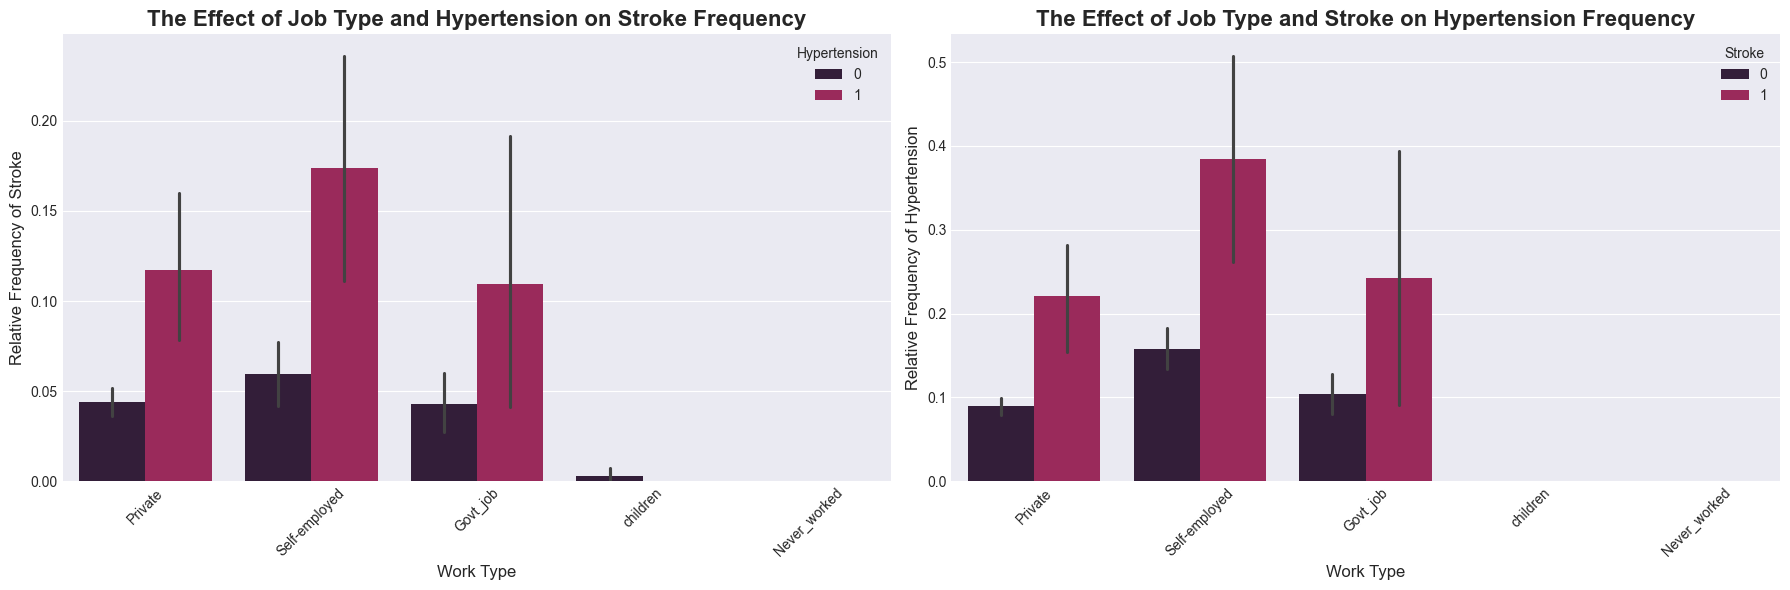

In [47]:
palette = {0: '#35193e', 1: '#ad1759'}  

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='Work_Type', y='Stroke', hue='Hypertension', data=df, palette=palette, ax=axes[0])
axes[0].set_title('The Effect of Job Type and Hypertension on Stroke Frequency', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Work Type', fontsize=12)
axes[0].set_ylabel('Relative Frequency of Stroke', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    x='Work_Type', 
    y='Hypertension', 
    hue='Stroke', 
    data=df, 
    palette=palette, 
    ax=axes[1]
)
axes[1].set_title('The Effect of Job Type and Stroke on Hypertension Frequency', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Work Type', fontsize=12)
axes[1].set_ylabel('Relative Frequency of Hypertension', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

## Görselleştirme: Inme ve Hipertansiyon İlişkisi 📊

- **Yukarıda verilen heatmap** ile gösterilen ilişki matrisi, bu **barchart** grafiği ile görselleştirilmiştir. Bu grafik, **hipertansiyonu olan ve olmayan bireylerde**, farklı meslek gruplarına göre **inme görülme sıklığını** (göreceli oranlarla) karşılaştırmaktadır.

- Ayrıca, bu grafik, farklı **iş türlerinde** inme durumuna göre **hipertansiyon görülme sıklığını** karşılaştırmaktadır.



---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Are males at higher risk of strokes due to work-related or lifestyle stress?
</span>

In [48]:
grouped_work_stress_male = df[df['Gender'] == 'Male' ].groupby(['Work_Type'])['Stroke'].mean().reset_index()
grouped_lifestyle_stress_male = df[df['Gender'] == 'Male'].groupby(['Smoking_Status', 'Ever_Married', 'BMI'])['Stroke'].mean().reset_index()

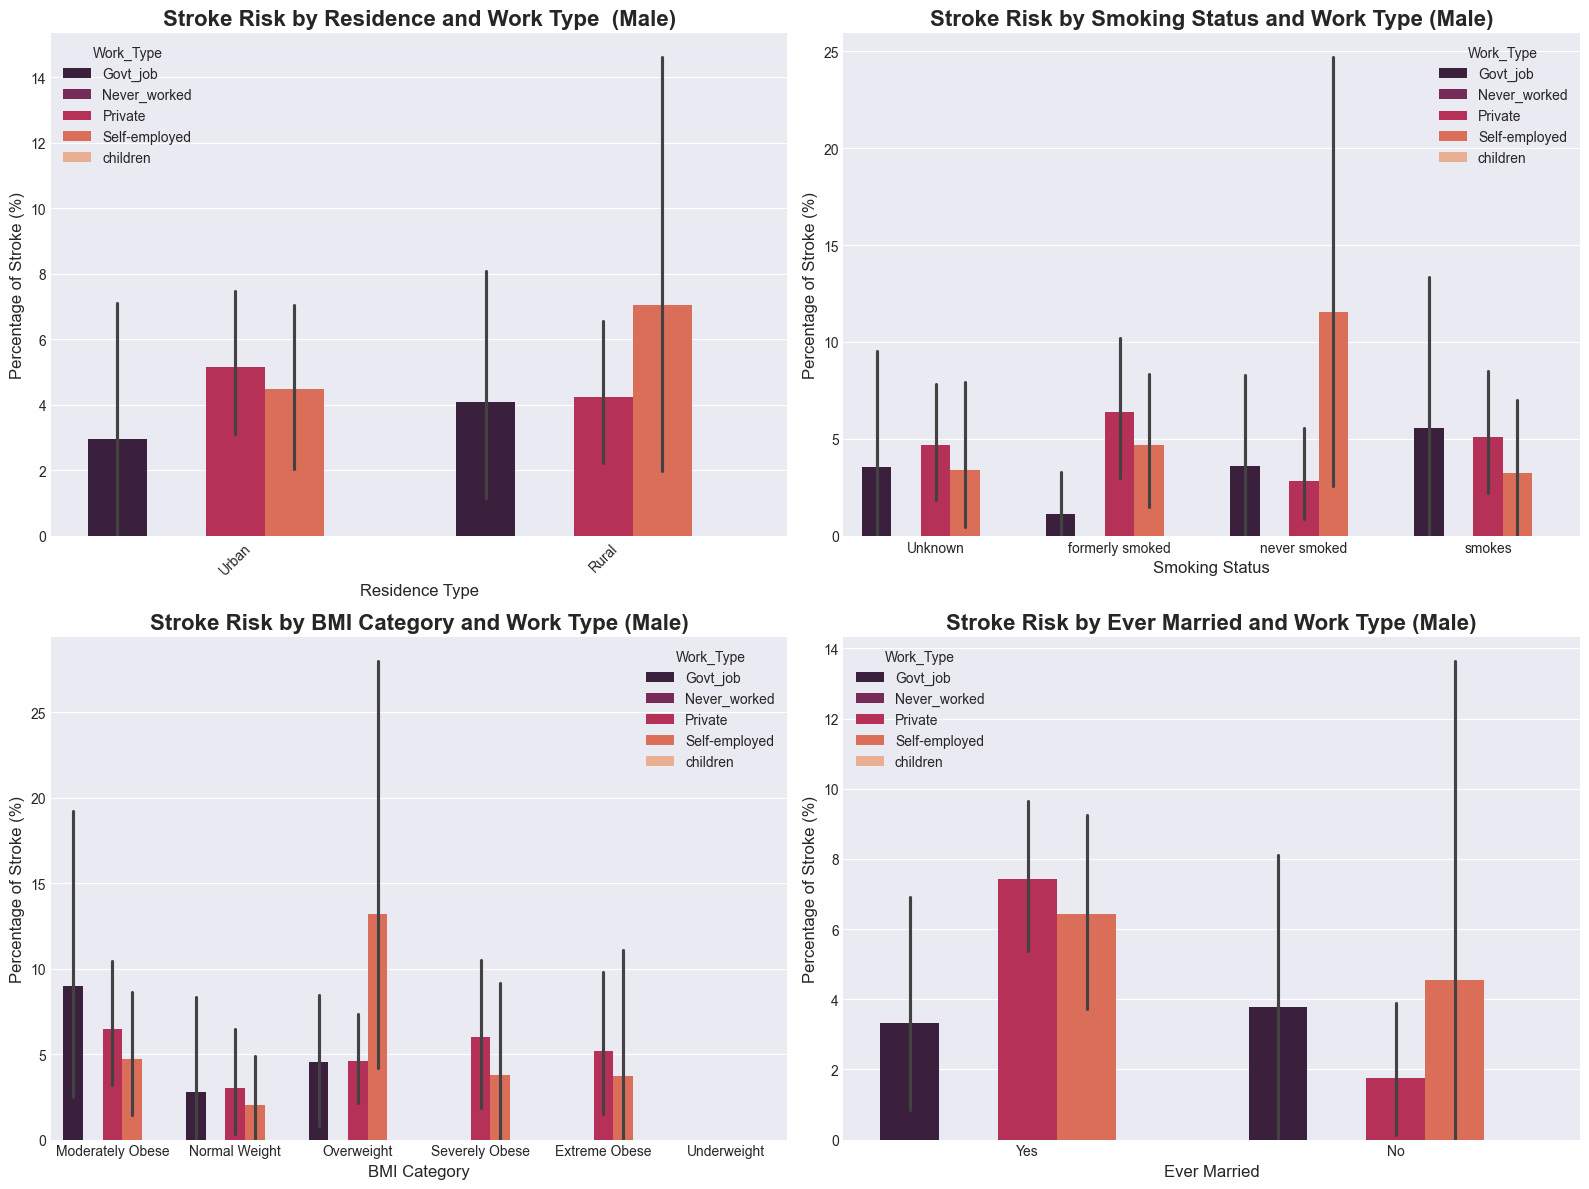

In [49]:
df_male = df[df['Gender'] == 'Male']

df_male_grouped = df_male.groupby(['Work_Type', 'Residence_Type', 'Smoking_Status', 'BMI_Group', 'Ever_Married', 'Stroke']).size().unstack(fill_value=0)

df_male_grouped_percent = df_male_grouped.div(df_male_grouped.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.barplot(x=df_male_grouped_percent.index.get_level_values('Residence_Type'), 
            y=df_male_grouped_percent[1], 
            hue=df_male_grouped_percent.index.get_level_values('Work_Type'),
            palette='rocket', ax=axes[0, 0])

axes[0, 0].set_title('Stroke Risk by Residence and Work Type  (Male)', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('Residence Type', fontsize=12)
axes[0, 0].set_ylabel('Percentage of Stroke (%)', fontsize=12)
axes[0, 0].set_xticklabels(['Urban', 'Rural'], rotation=45)


sns.barplot(x=df_male_grouped_percent.index.get_level_values('Smoking_Status'), 
            y=df_male_grouped_percent[1], 
            hue=df_male_grouped_percent.index.get_level_values('Work_Type'),
            palette='rocket', ax=axes[0, 1])

axes[0, 1].set_title('Stroke Risk by Smoking Status and Work Type (Male)', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('Smoking Status', fontsize=12)
axes[0, 1].set_ylabel('Percentage of Stroke (%)', fontsize=12)


sns.barplot(x=df_male_grouped_percent.index.get_level_values('BMI_Group'), 
            y=df_male_grouped_percent[1], 
            hue=df_male_grouped_percent.index.get_level_values('Work_Type'),
            palette='rocket', ax=axes[1, 0])

axes[1, 0].set_title('Stroke Risk by BMI Category and Work Type (Male)', fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel('BMI Category', fontsize=12)
axes[1, 0].set_ylabel('Percentage of Stroke (%)', fontsize=12)


sns.barplot(x=df_male_grouped_percent.index.get_level_values('Ever_Married'), 
            y=df_male_grouped_percent[1], 
            hue=df_male_grouped_percent.index.get_level_values('Work_Type'),
            palette='rocket', ax=axes[1, 1])

axes[1, 1].set_title('Stroke Risk by Ever Married and Work Type (Male)', fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel('Ever Married', fontsize=12)
axes[1, 1].set_ylabel('Percentage of Stroke (%)', fontsize=12)

plt.tight_layout()   
plt.show()


## Stroke Risk by Residence and Work Type (Male) 🌍💼
1. **Kırsal Bölgelerde (Rural):** 
   - Kendi işinde çalışan erkeklerin (Self-employed) **stroke riski**, diğer iş türlerine göre daha yüksektir.
   
2. **Kentsel Bölgelerde (Urban):** 
   - **Stroke riski** daha dengeli dağılım göstermektedir, ancak yine **Self-employed** grubunda daha yüksek risk görülmektedir.
   
3. **Children ve Never_worked Grubu:** 
   - Bu gruplarda **stroke riski** oldukça düşüktür.
   
### Genel Yorum: 
- **Kırsal bölgede** yaşayan ve kendi işinde çalışan erkekler, daha yüksek stroke riski taşımaktadır.

## Stroke Risk by Smoking Status and Work Type (Male) 🚬💼
1. **Sigara İçmeyenler (Never Smoked):**
   - Kendi işinde çalışan erkeklerde **stroke riski**, diğer gruplara göre daha yüksektir.
   
2. **Eski Sigara İçenler (Formerly Smoked):**
   - Stroke riski **Self-employed** grubunda daha belirgindir.
   
3. **Aktif Sigara İçenler (Smokes):**
   - **Stroke riski** yine **Self-employed** grubunda daha belirgindir.
   
4. **Children Grubu:** 
   - Tüm sigara içme durumlarında çok düşük stroke riski taşımaktadır.
   
### Genel Yorum:
- **Sigara içme durumu**, özellikle **kendi işinde çalışan erkekler** için **stroke riskini artırmaktadır**.

## Stroke Risk by BMI Category and Work Type (Male) ⚖️💼
1. **Overweight (Kilolu) ve Moderately Obese (Hafif Obez):**
   - Kendi işinde çalışan erkekler, **stroke riski açısından en riskli gruptur**.
   
2. **Diğer BMI Kategorileri (Severely Obese, Extreme Obese, Underweight):** 
   - **Stroke riski** nispeten daha düşüktür ve dengelidir.
   
3. **Children Kategorisi:** 
   - Her BMI seviyesinde düşük stroke riski taşımaktadır.
   
### Genel Yorum:
- **Aşırı kilolu** veya **hafif obez bireylerde**, **iş türü stroke riski üzerinde önemli bir etki yapmaktadır**; özellikle **Self-employed** grubunda risk daha yüksektir.

## Stroke Risk by Ever Married and Work Type (Male) 💍💼
1. **Evlilik Durumu "Evet" (Yes):**
   - **Self-employed** ve **Private** iş türlerinde, **stroke riski** daha yüksektir.
   
2. **Evlilik Durumu "Hayır" (No):** 
   - **Stroke riski** genel olarak düşüktür, ancak **Self-employed** kategorisinde yine diğer gruplara göre daha belirgindir.
   
3. **Children Kategorisi:** 
   - Evlilik durumuna göre stroke riski oldukça düşüktür.

### Genel Yorum:
- **Evlilik durumu**, özellikle **kendi işinde çalışan erkeklerde stroke riskini artıran bir faktör olabilir**.


---

<div class="alert alert-block alert-success">

### <span style=" color:red"> How does the combination of risk factors amplify stroke likelihood?
</span>

In [50]:
df['Life_Style_Risk_Factor'] = df['Ever_Married'] + '_' + df['Smoking_Status'] + '_' + df['Residence_Type']

In [51]:
df['Life_Style_Risk_Factor']

0       Yes_formerly smoked_Urban
1          Yes_never smoked_Rural
2          Yes_never smoked_Rural
3                Yes_smokes_Urban
4          Yes_never smoked_Rural
                  ...            
5105       Yes_never smoked_Urban
5106       Yes_never smoked_Urban
5107       Yes_never smoked_Rural
5108    Yes_formerly smoked_Rural
5109            Yes_Unknown_Urban
Name: Life_Style_Risk_Factor, Length: 5109, dtype: object

In [52]:
df_40=  df[df['Age'] >= 40]
df['Composite_Variable'] = df_40['Ever_Married'] + '_' + df_40['Smoking_Status'] + '_' + df_40['Residence_Type']

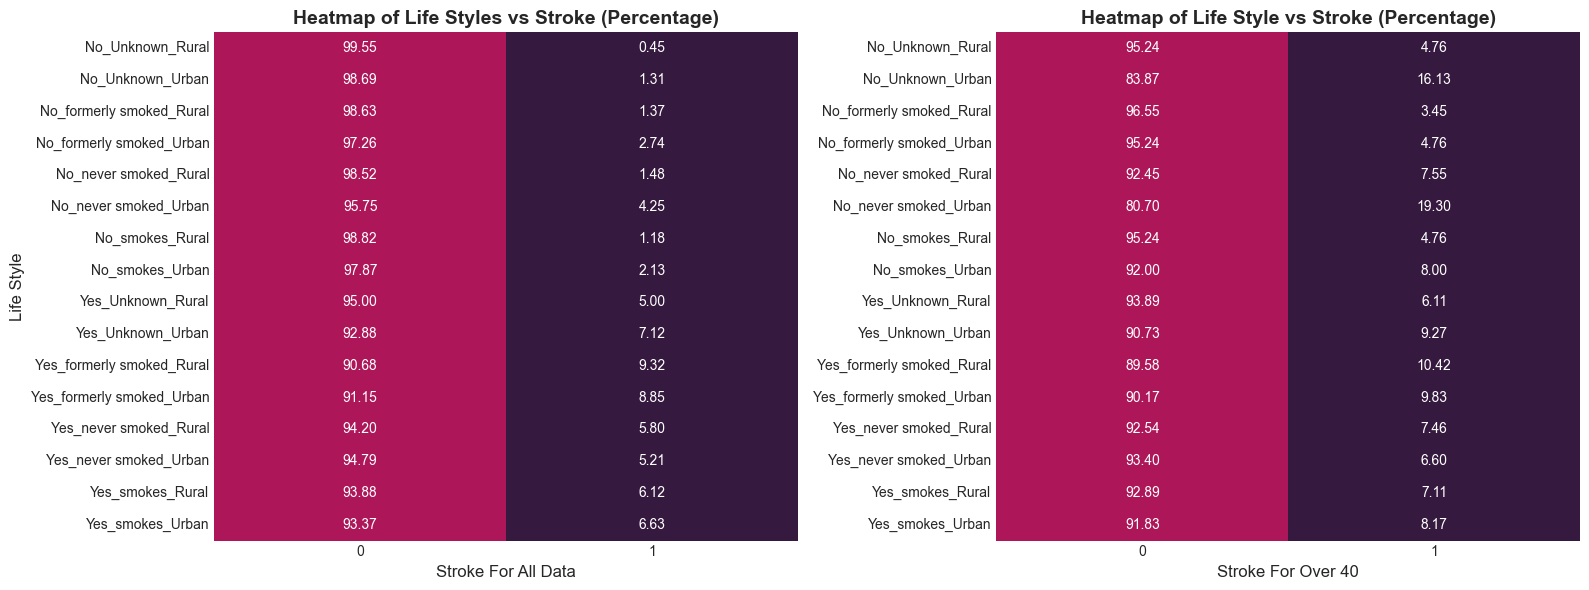

In [53]:
composit_counts_1 = pd.crosstab(df['Composite_Variable'], df['Stroke'])
composit_percent_1 = composit_counts_1.div(composit_counts_1.sum(axis=1), axis=0) * 100

composit_counts_2 = pd.crosstab(df['Life_Style_Risk_Factor'], df['Stroke'])
composit_percent_2 = composit_counts_2.div(composit_counts_2.sum(axis=1), axis=0) * 100


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(composit_percent_1, annot=True, fmt=".2f", cmap=dark_purple_rose_red_cmap, cbar=False, ax=axes[1])
axes[1].set_title('Heatmap of Life Style vs Stroke (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Stroke For Over 40', fontsize=12)
axes[1].set_ylabel('', fontsize=12)

sns.heatmap(composit_percent_2, annot=True, fmt=".2f", cmap=dark_purple_rose_red_cmap, cbar=False, ax=axes[0])
axes[0].set_title('Heatmap of Life Styles vs Stroke (Percentage)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Stroke For All Data', fontsize=12)
axes[0].set_ylabel('Life Style', fontsize=12)

plt.tight_layout()
plt.show()

## Stroke Risk by Age and Lifestyle Analysis 🧠👨‍⚕️

1. **Stroke = 0 (Inme Olmayanlar):**
   - **Tüm veri grubu** ile **40 yaş üzeri grup** arasında çok büyük farklar gözlemlenmemektedir. Bu, yaşın inme riski üzerinde belirgin bir etkisi olmadığını göstermektedir.

2. **Stroke = 1 (Inme Geçirenler):**
   - **40 yaş üzeri grup** için **tüm lifestyle kategorilerinde** inme riski artmaktadır. Bu, yaşın ilerlemesiyle birlikte yaşam tarzı faktörlerinin inme riskini daha belirgin şekilde artırdığına işaret etmektedir.

### Grafikle İlişkili Yorum:
- **Tüm veri grubu** ve **40 yaş üzeri grup** arasındaki farkları daha iyi anlayabilmek için aşağıdaki **bar grafiklerinin** oluşturulması sağlanmıştır.

---

In [54]:
composit_percent_1[1] / composit_percent_2[1]

Composite_Variable
No_Unknown_Rural             10.523810
No_Unknown_Urban             12.338710
No_formerly smoked_Rural      2.517241
No_formerly smoked_Urban      1.738095
No_never smoked_Rural         5.113208
No_never smoked_Urban         4.543860
No_smokes_Rural               4.047619
No_smokes_Urban               3.760000
Yes_Unknown_Rural             1.221374
Yes_Unknown_Urban             1.302419
Yes_formerly smoked_Rural     1.118152
Yes_formerly smoked_Urban     1.109827
Yes_never smoked_Rural        1.287313
Yes_never smoked_Urban        1.267573
Yes_smokes_Rural              1.162531
Yes_smokes_Urban              1.233109
Name: 1, dtype: float64

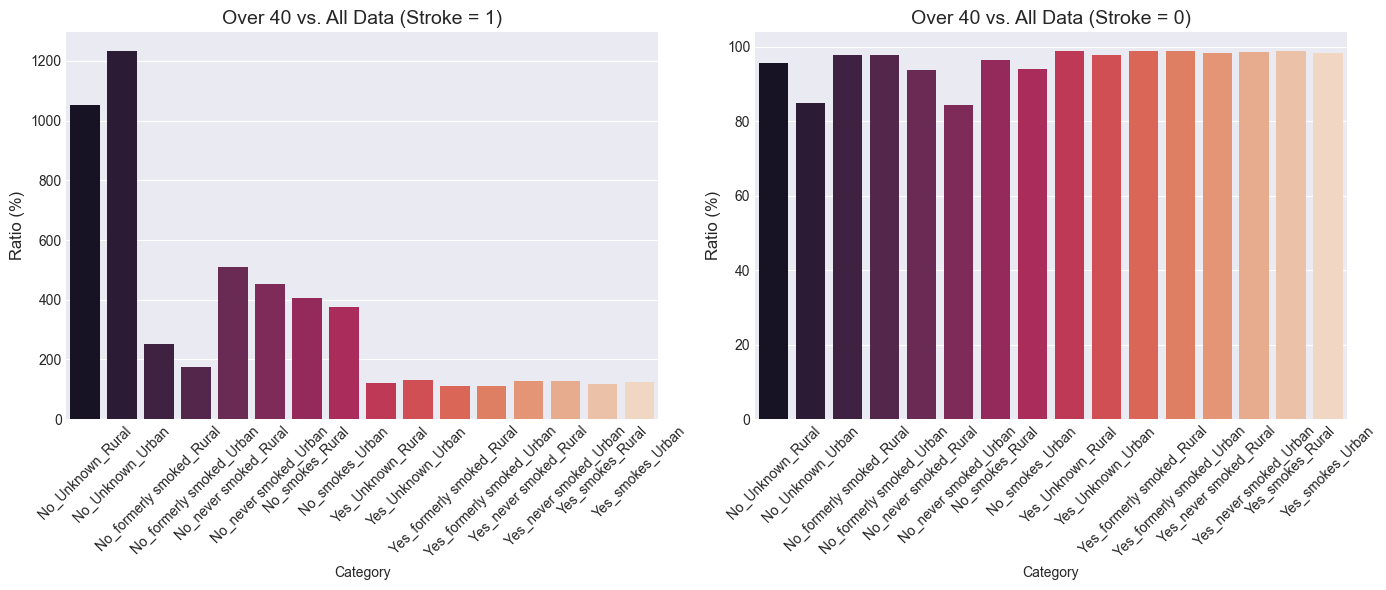

In [55]:
ratio_percent_1 = (composit_percent_1[1] / composit_percent_2[1]) * 100
ratio_percent_2 = (composit_percent_1[0] / composit_percent_2[0]) * 100

ratio_df_1 = pd.DataFrame({
    'Category': composit_percent_1.index,  
    'Ratio (%)': ratio_percent_1
}).reset_index(drop=True)

ratio_df_2 = pd.DataFrame({
    'Category': composit_percent_1.index,  
    'Ratio (%)': ratio_percent_2
}).reset_index(drop=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=ratio_df_1, x='Category', y='Ratio (%)', palette='rocket', ax=axes[0])
axes[0].set_title('Over 40 vs. All Data (Stroke = 1)', fontsize=14)
axes[0].set_xlabel('Category', fontsize=10)
axes[0].set_ylabel('Ratio (%)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=ratio_df_2, x='Category', y='Ratio (%)', palette='rocket', ax=axes[1])
axes[1].set_title('Over 40 vs. All Data (Stroke = 0)', fontsize=14)
axes[1].set_xlabel('Category', fontsize=10)
axes[1].set_ylabel('Ratio (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 40 Yaş ve Üstü Grubunun İncelenmesi 🔍

İncelemelerimiz sonucunda, **40 yaş ve üzeri** yaş grubunun **stroke riskinin yüksek** olduğu bilgisinden yola çıkarak, bu grubu daha detaylı incelemeye karar verdik. Bu nedenle, **tüm veri** ve **40 yaş üzeri** olarak iki farklı **heatmap** oluşturduk.

### Detaylı İncelemeler:
- **40 yaş üzeri grup**, tüm yaş grupları göz önünde bulundurulduğunda, **neredeyse bütün kategorilerde** çok daha fazla **inme riski** taşıdığı gözlemlenmiştir.
- Bu bulgu, yaşın ilerlemesiyle birlikte inme riskinin arttığını ve bu gruptaki bireylerin sağlık durumlarına özel önlemler alınması gerektiğini vurgulamaktadır.


---

In [56]:
new_df = df.copy()

In [57]:
new_df['Hypertension'] = new_df['Hypertension'].replace({0: 'No', 1: 'Yes'})
new_df['Heart_Disease'] = new_df['Heart_Disease'].replace({0: 'No', 1: 'Yes'})

In [58]:
new_df['Health_Risk_Factors'] = new_df['Hypertension'] + '_' + new_df['Heart_Disease'] + '_' + new_df['BMI_Group']  

In [59]:
composit_counts2 = pd.crosstab(new_df['Health_Risk_Factors'], new_df['Stroke'])

In [60]:
composit_percent2 = composit_counts2.div(composit_counts2.sum(axis=1), axis=0) * 100

In [61]:
custom_colors = ['#35193e', '#ad1759']

# Verileri uzun formata dönüştür
composit_percent2_long = composit_percent2.reset_index().melt(
    id_vars='Health_Risk_Factors', 
    var_name='Stroke', 
    value_name='Percentage'
)

# Alt grafikler için figür oluştur
fig = make_subplots(
    rows=2, cols=1, 
    subplot_titles=(
        'Health Risk Factors vs Stroke Distribution',
        'Stroke Risk Analysis by Health Factors'
    ),
    vertical_spacing=0.3,  # Grafiler arası boşluğu artır
    specs=[[{"secondary_y": True}], [{"secondary_y": True}]]  # İkincil y ekseni ekle
)

# 1. Bar grafiği oluştur
bar_fig = px.bar(
    composit_percent2_long, 
    x='Health_Risk_Factors', 
    y='Percentage', 
    color='Stroke', 
    barmode='group', 
    text='Percentage',
    labels={'Health_Risk_Factors': 'Health Risk Factors', 'Percentage': 'Percentage (%)'},
    color_discrete_sequence=custom_colors
)

# Bar grafiği trace'lerini ekle
for trace in bar_fig.data:
    fig.add_trace(trace, row=1, col=1)

# Bar grafiği metin ve düzen ayarları
fig.update_traces(
    texttemplate='%{y:.1f}%', 
    textposition='outside',
    textfont=dict(size=10),
    row=1, col=1
)

# 2. Scatter plot oluştur
scatter_fig = px.scatter(
    composit_percent2_long, 
    x='Health_Risk_Factors', 
    y='Stroke', 
    size='Percentage', 
    color='Health_Risk_Factors',
    labels={'Health_Risk_Factors': 'Health Risk Factors', 'Stroke': 'Stroke'},
    color_discrete_sequence=custom_colors
)

# Scatter plot trace'lerini ekle
for trace in scatter_fig.data:
    fig.add_trace(trace, row=2, col=1)

# Genel düzen ayarları
fig.update_layout(
    height=1000,
    title={
        'text': 'Health Risk Factors and Stroke Analysis',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24)
    },
    template='plotly_white',
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.45,  # İlk grafiğin altına yerleştir
        xanchor="left",
        x=1.05,  # Grafiğin sağına yerleştir
        title="Stroke Status",
        bgcolor="rgba(255, 255, 255, 0.8)",
        bordercolor="lightgray",
        borderwidth=1
    )
)

# Alt grafiklere özel ayarlar
fig.update_xaxes(
    title_text='Health Risk Factors',
    row=1,
    col=1,
    tickangle=45,
    gridcolor='lightgray'
)

fig.update_yaxes(
    title_text='Percentage (%)',
    row=1,
    col=1,
    gridcolor='lightgray'
)

fig.update_xaxes(
    title_text='Health Risk Factors',
    row=2,
    col=1,
    tickangle=45,
    gridcolor='lightgray'
)

fig.update_yaxes(
    title_text='Stroke',
    row=2,
    col=1,
    gridcolor='lightgray'
)

# Grafik kenar boşluklarını ayarla ve sağ tarafta legend için yer aç
fig.update_layout(
    margin=dict(t=150, b=100, l=100, r=200)  # Sağ margin'i artır
)

fig.show()


- Yapılan **2 grafik** 📊, aynı analizi göstermektedir. Sağlık durumunun **stroke** 🧠 üzerindeki etkisini inceledik. 

### Kullanılan Sağlık Değerleri:
- **BMI (Vücut Kitle İndeksi)**, **Hipertansiyon** ❤️‍🩹 ve **Kalp Hastalığı** 💔 gibi sağlık göstergelerini kullandık.

### Bulgular:
- **Hipertansiyon** veya **kalp hastalığı** olan bireylerde ve **BMI'si normalin üzerinde** olanlarda, **stroke oranının** arttığı gözlemlenmiştir 📈.
- Bu, **hipertansiyon**, **kalp hastalığı** ve **yüksek BMI**'nin **stroke riski** üzerinde önemli bir etkisi olduğunu göstermektedir 🚨.

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Do lifestyle and residence type influence stroke patterns?
</span>

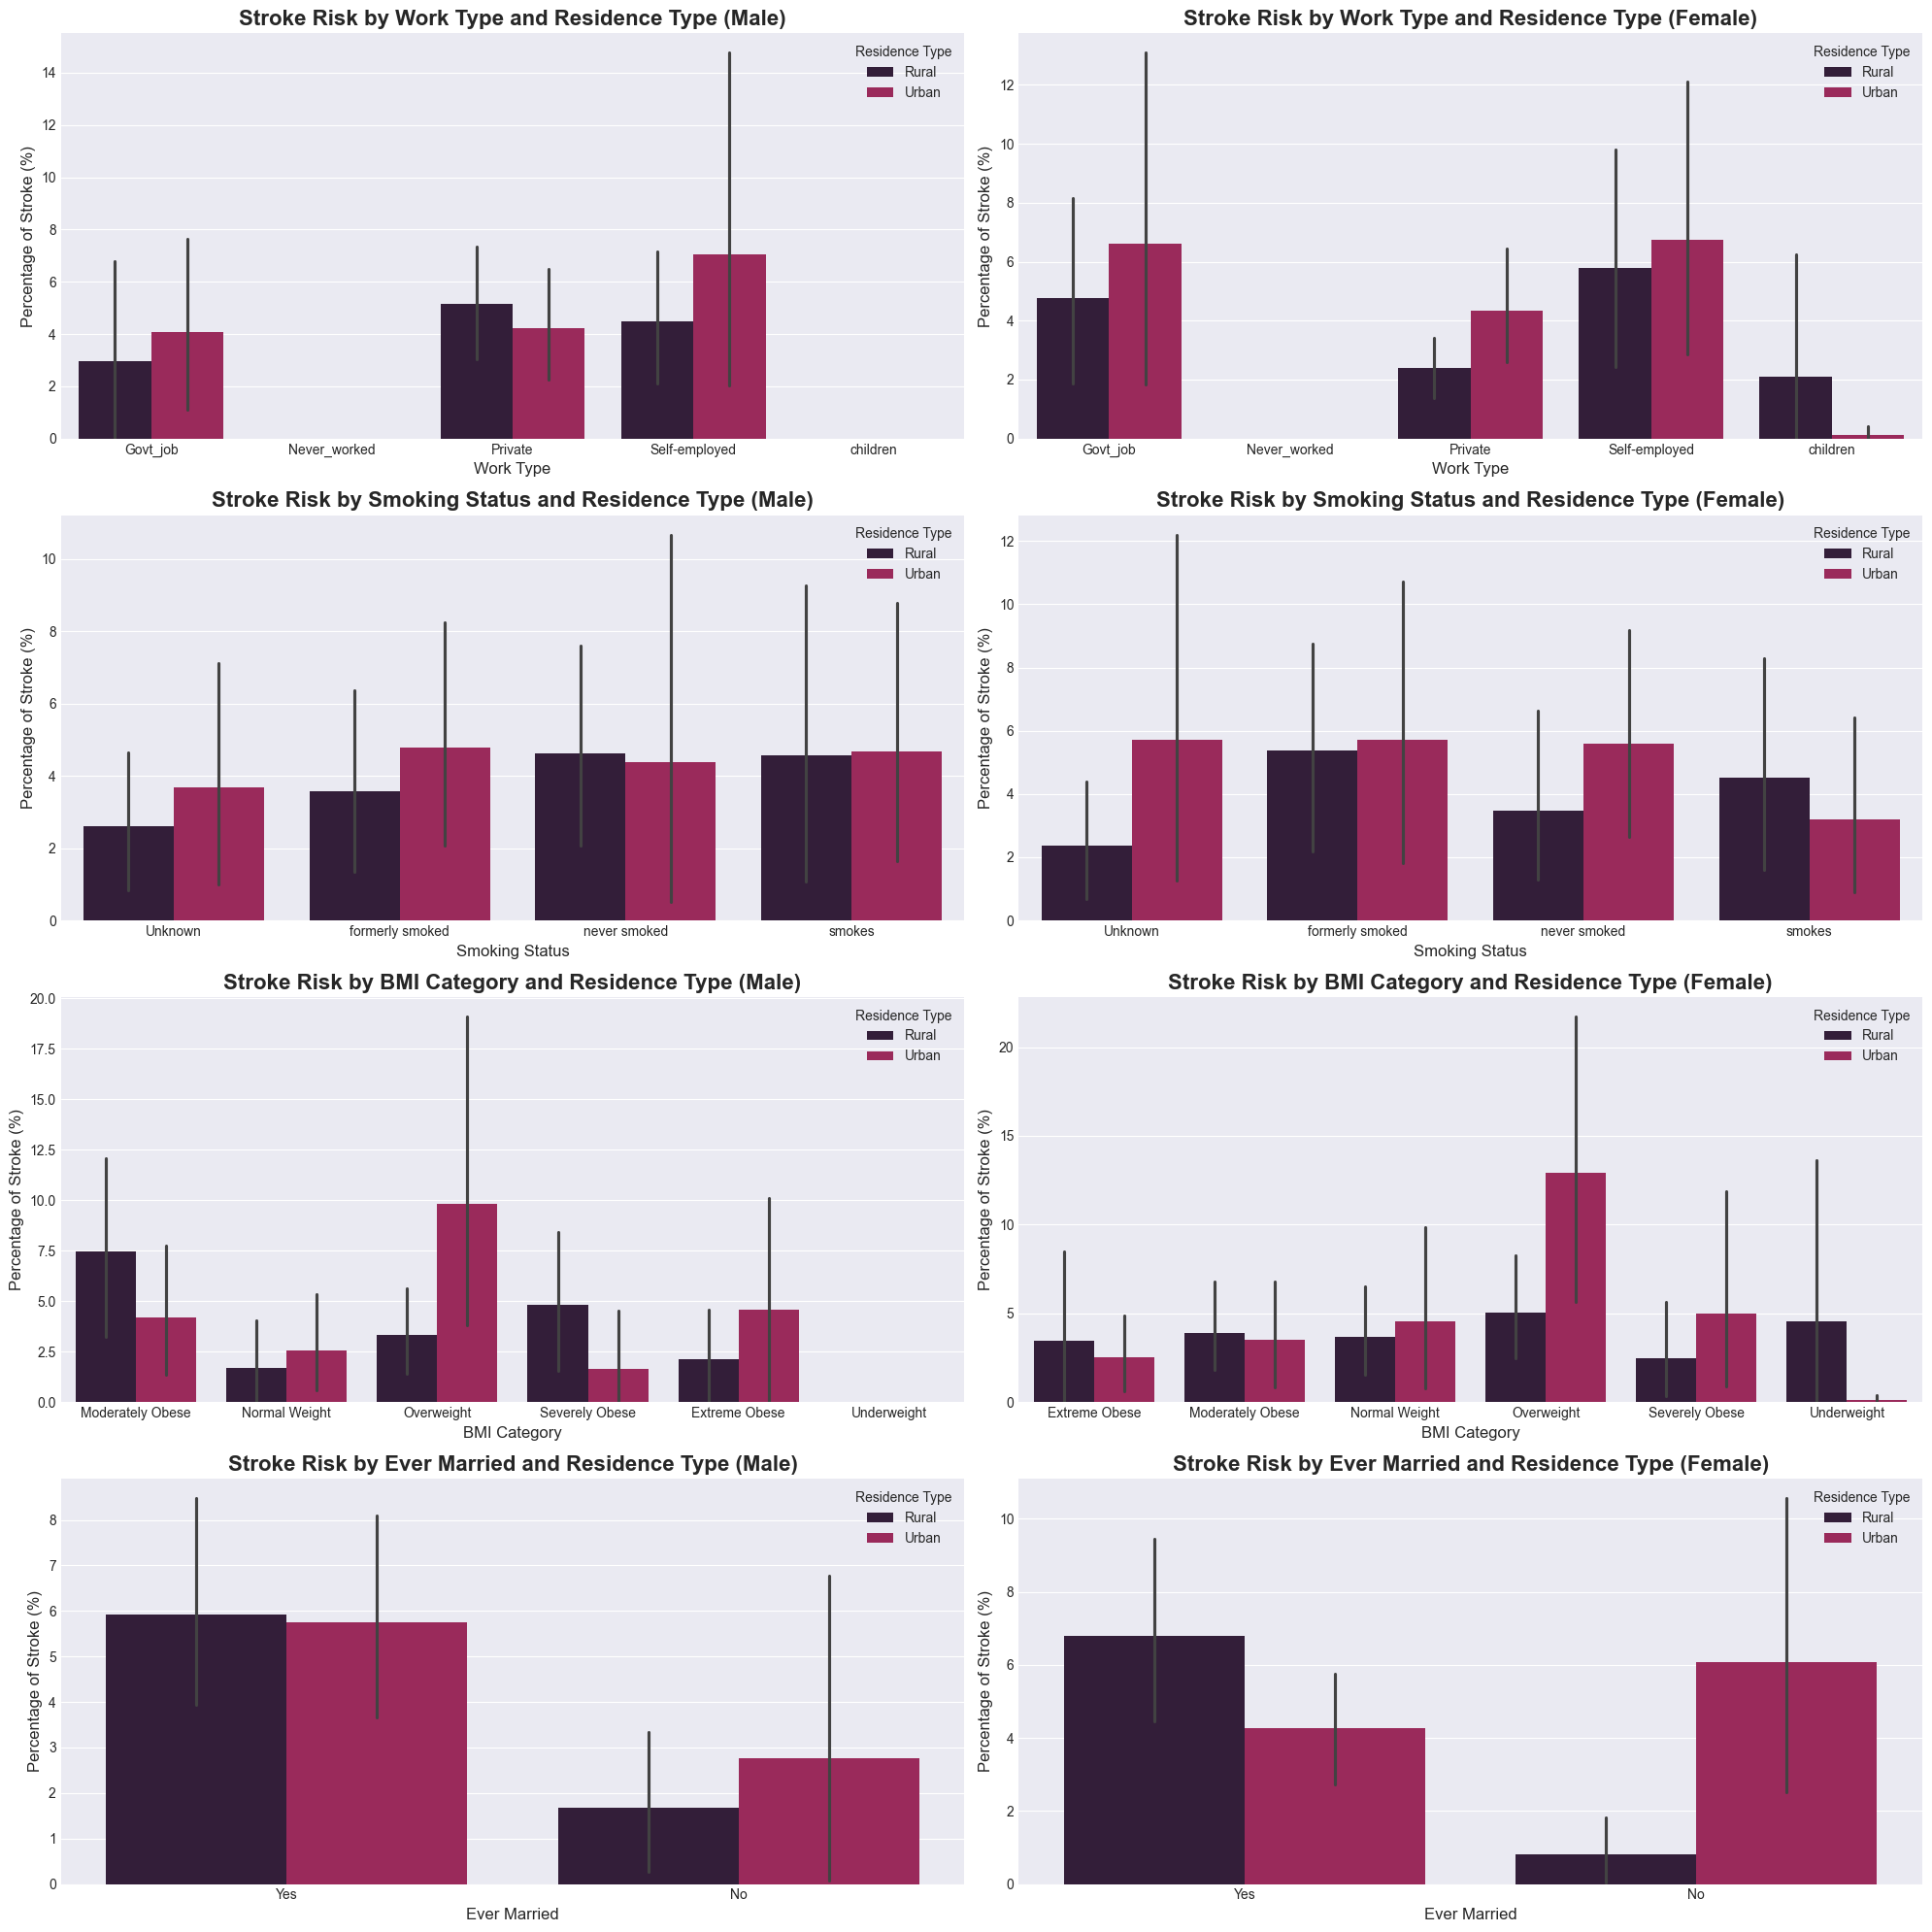

In [62]:
# Assuming df is already loaded
# Grouping data for both genders
df_grouped = df.groupby(['Gender', 'Work_Type', 'Residence_Type', 'Smoking_Status', 'BMI_Group', 'Ever_Married', 'Stroke']).size().unstack(fill_value=0)

# Calculating percentages
df_grouped_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Creating subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

# Plotting for Male and Female for different attributes
genders = ['Male', 'Female']

for i, gender in enumerate(genders):
    # Filter data for the specific gender
    df_gender = df_grouped_percent.loc[gender]

    # Stroke Risk by Work_Type and Residence_Type
    sns.barplot(x=df_gender.index.get_level_values('Work_Type'),
                y=df_gender[1],
                hue=df_gender.index.get_level_values('Residence_Type'),
                palette=['#35193e', '#ad1759'], ax=axes[0, i])
    
    axes[0, i].set_title(f'Stroke Risk by Work Type and Residence Type ({gender})', fontsize=16, fontweight='bold')
    axes[0, i].set_xlabel('Work Type', fontsize=12)
    axes[0, i].set_ylabel('Percentage of Stroke (%)', fontsize=12)
    axes[0, i].legend(title='Residence Type')

    # Stroke Risk by Smoking_Status and Residence_Type
    sns.barplot(x=df_gender.index.get_level_values('Smoking_Status'),
                y=df_gender[1],
                hue=df_gender.index.get_level_values('Residence_Type'),
                palette=['#35193e', '#ad1759'], ax=axes[1, i])

    axes[1, i].set_title(f'Stroke Risk by Smoking Status and Residence Type ({gender})', fontsize=16, fontweight='bold')
    axes[1, i].set_xlabel('Smoking Status', fontsize=12)
    axes[1, i].set_ylabel('Percentage of Stroke (%)', fontsize=12)
    axes[1, i].legend(title='Residence Type')

    # Stroke Risk by BMI_Group and Residence_Type
    sns.barplot(x=df_gender.index.get_level_values('BMI_Group'),
                y=df_gender[1],
                hue=df_gender.index.get_level_values('Residence_Type'),
                palette=['#35193e', '#ad1759'], ax=axes[2, i])

    axes[2, i].set_title(f'Stroke Risk by BMI Category and Residence Type ({gender})', fontsize=16, fontweight='bold')
    axes[2, i].set_xlabel('BMI Category', fontsize=12)
    axes[2, i].set_ylabel('Percentage of Stroke (%)', fontsize=12)
    axes[2, i].legend(title='Residence Type')

    # Stroke Risk by Ever_Married and Residence_Type
    sns.barplot(x=df_gender.index.get_level_values('Ever_Married'),
                y=df_gender[1],
                hue=df_gender.index.get_level_values('Residence_Type'),
                palette=['#35193e', '#ad1759'], ax=axes[3, i])

    axes[3, i].set_title(f'Stroke Risk by Ever Married and Residence Type ({gender})', fontsize=16, fontweight='bold')
    axes[3, i].set_xlabel('Ever Married', fontsize=12)
    axes[3, i].set_ylabel('Percentage of Stroke (%)', fontsize=12)
    axes[3, i].legend(title='Residence Type')

plt.tight_layout()
plt.show()

- **Erkek ve Kadınların yaşam tarzlarının**, **residence type** (yaşam alanı türü) özelinde **stroke** 🧠'u nasıl etkilediğini incelemek istedik.

- **Kadın ve erkekler** için belirgin farklar gözlemlenmiştir 👩‍⚕️👨‍⚕️. Örneğin, **evlilik durumu** 💍'nun stroke üzerindeki etkisi kadın ve erkekler için farklıdır (son grafik).

- Grafiklerden görüldüğü üzere, yaşam tarzları ve **yaşadığı yerin** 🏠 **stroke** üzerindeki etkisi belirgindir.


---

<div class="alert alert-block alert-success">

### <span style=" color:red"> What patterns emerge when analyzing age and lifestyle factors together?
</span>

How does stroke probability change as more risk factors overlap (e.g., age > 60, smoking, and heart disease)?

In [63]:
df_60 = df.copy()

In [64]:
def create_composite_variable(df, columns, separator='_'):
    """
    Verilen kolonları birleştirerek yeni bir değişken oluşturur.
    
    Args:
        df: DataFrame
        columns: Birleştirilecek kolon isimleri listesi
        separator: Kolonları birleştirirken kullanılacak ayraç
    
    Returns:
        Birleştirilmiş string
    """
    return df[columns].astype(str).agg(separator.join, axis=1)

def filter_by_age_group(df):
    """
    Yaş gruplarına göre veriyi filtreler ve her grup için composite değişkenler oluşturur.
    
    Args:
        df: İşlenecek DataFrame
    
    Returns:
        Dictionary of DataFrames, her yaş grubu için bir DataFrame içerir
    """
    # Birleştirilecek değişkenler
    composite_columns = ['Ever_Married', 'Smoking_Status', 'Residence_Type']
    
    # Yaş gruplarına göre filtreleme
    age_groups = {
        'middle': (df['Age'] >= 40) & (df['Age'] < 60),
        'young': df['Age'] < 40,
        'elderly': df['Age'] >= 60
    }
    
    result = {}
    for group_name, age_filter in age_groups.items():
        # Filtrelenmiş DataFrame
        filtered_df = df[age_filter].copy()
        
        # Composite değişken oluşturma
        filtered_df[f'Composite_Variable_{group_name}'] = create_composite_variable(
            filtered_df, 
            composite_columns
        )
        
        result[group_name] = filtered_df
        
    return result

# Kullanım örneği:
filtered_data = filter_by_age_group(df_60)

In [65]:
# Tüm yaş grupları için filtrelenmiş verileri al
filtered_data = filter_by_age_group(df_60)

# Belirli bir yaş grubunun verisine erişim
young_data = filtered_data['young']
middle_age_data = filtered_data['middle']
elderly_data = filtered_data['elderly']

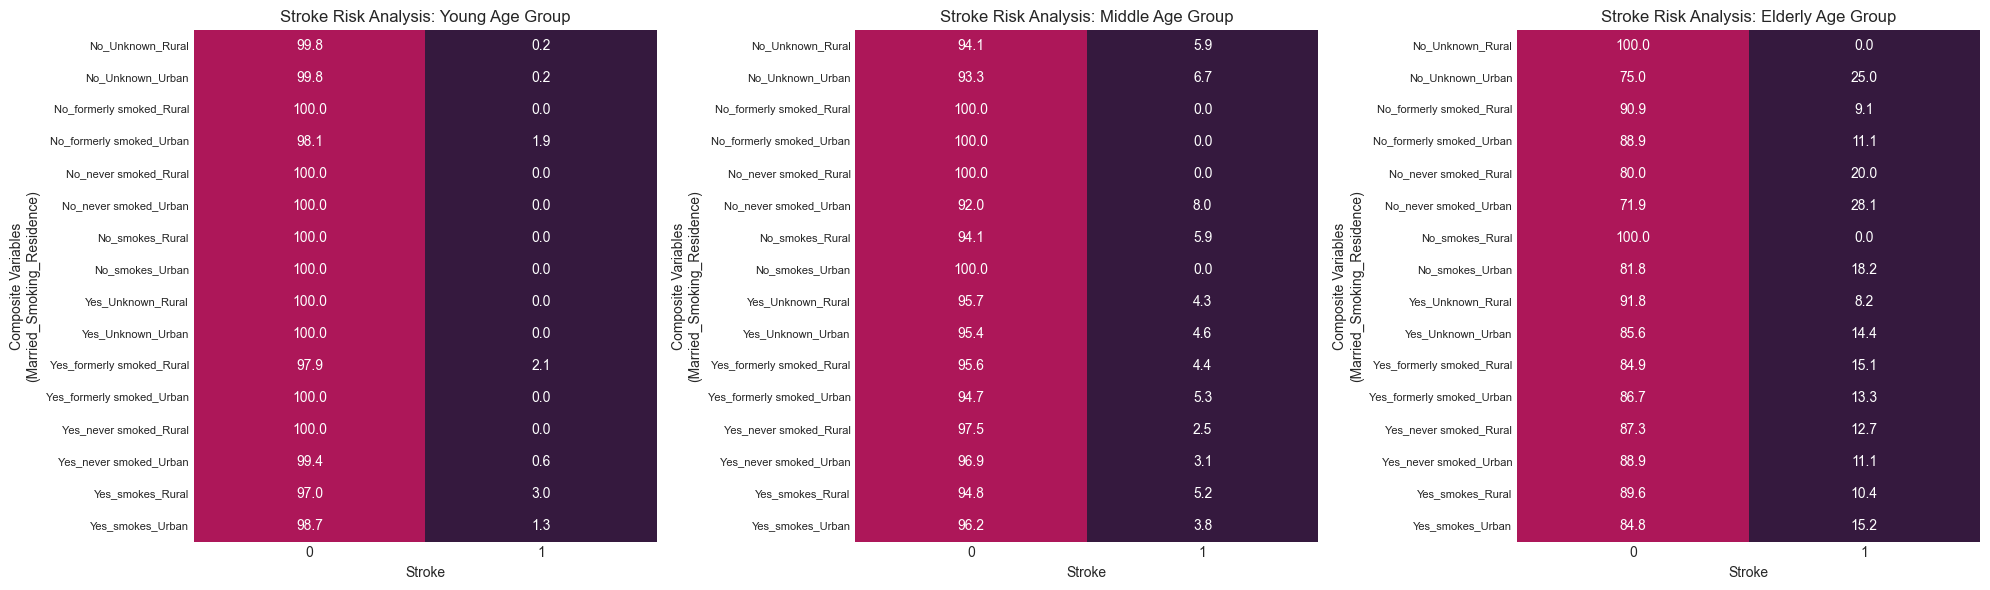

In [66]:
def create_stroke_heatmaps(filtered_data, df_original, age_groups=['young', 'middle', 'elderly']):
    """
    Her yaş grubu için stroke oranlarını gösteren heatmap'ler oluşturur.
    
    Args:
        filtered_data: Yaş gruplarına göre filtrelenmiş veriler (dictionary)
        df_original: Orijinal DataFrame
        age_groups: Analiz edilecek yaş grupları
    """
    # Grafik alanını oluştur
    fig, axes = plt.subplots(1, len(age_groups), figsize=(20, 6))
    
    # Her yaş grubu için heatmap oluştur
    for idx, group in enumerate(age_groups):
        # Crosstab ve yüzde hesaplama
        counts = pd.crosstab(filtered_data[group][f'Composite_Variable_{group}'], 
                           df_original['Stroke'])
        percentages = counts.div(counts.sum(axis=1), axis=0) * 100
        
        # Heatmap çizimi
        sns.heatmap(percentages, 
                   annot=True, 
                   fmt=".1f", 
                   cmap=dark_purple_rose_red_cmap, 
                   cbar=False, 
                   ax=axes[idx])
        
        # Grafik başlıkları ve etiketleri
        axes[idx].set_title(f'Stroke Risk Analysis: {group.replace("_", " ").title()} Age Group')
        axes[idx].set_xlabel('Stroke')
        axes[idx].set_ylabel('Composite Variables\n(Married_Smoking_Residence)')
        
        # Y eksen etiketlerini daha okunabilir yap
        axes[idx].tick_params(axis='y', labelsize=8)
    
    # Grafiklerin düzenlenmesi
    plt.tight_layout()
    return fig

# Kullanım örneği:
def analyze_stroke_risk(df_60):
    # Önce verileri filtrele
    filtered_data = filter_by_age_group(df_60)
    
    # Heatmap'leri oluştur
    fig = create_stroke_heatmaps(filtered_data, df_60)
    
    # Grafiği göster
    plt.show()
    
    return filtered_data

# Analizi çalıştır
filtered_results = analyze_stroke_risk(df_60)

- **Genç Yaş Grubu** (Sol Isı Haritası):
    - İnme vakalarının çoğu (sütun 1 ile belirtilmiş) tüm değişkenler arasında çok düşük oranlarda gerçekleşiyor 💭.
    - Sigara içmeyen 🚭 veya **kentsel/kırsal** durumu bilinmeyen bireylerde inme olasılıklarının oldukça düşük olduğu görülüyor.

- **Orta Yaş Grubu** (Orta Isı Haritası):
    - İnme vakaları (1), genç gruba kıyasla biraz daha yüksek oranlarda görülmeye başlıyor 📈, özellikle sigara içenlerde 🚬 veya karma bir baz durumunda olan bireylerde.
    - Örneğin “Sigara içmeyen, kırsalda yaşayan” gruplarda inme ile ilgili değerlerde belirgin bir yoğunlaşma fark ediliyor 🌄.

- **Yaşlı Yaş Grubu** (Sağ Isı Haritası):
    - İnme oranları önemli ölçüde artıyor 🧠 (örneğin, kırsal gruplarda sigara içme geçmişi olanlar arasında %25 veya daha yüksek oranlar).
    - Kırsal ve kentsel popülasyonlar arasında belirgin farklılıklar görülüyor 🌍, özellikle sigara içme veya bilinen kardiyovasküler risk faktörlerine sahip olanlar için.

**Çıkarımlar**:
- **Yaş İlişkisi**: Yaş ilerledikçe inme riski belirgin şekilde artıyor 📊. Bu, sol haritadan sağ haritaya doğru geçişte açıkça görülüyor.
- **Sigara ve Kırsallık Etkisi**: Sigara içmek önemli bir risk faktörü olarak öne çıkıyor 🚬. Yaşlı gruplardaki kırsal popülasyonlar, kentsel popülasyonlara kıyasla daha yüksek risk taşıyor.
- **Önleyici Odak**: Genç ve orta yaş gruplarında sigarayı bırakma gibi önleyici tedbirler daha etkili olabilirken 🚭, yaşlı gruplar için hedefe yönelik sağlık müdahaleleri gerekebilir ⚕️.


---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Does marital status (ever_married) correlate with stroke likelihood?
</span>

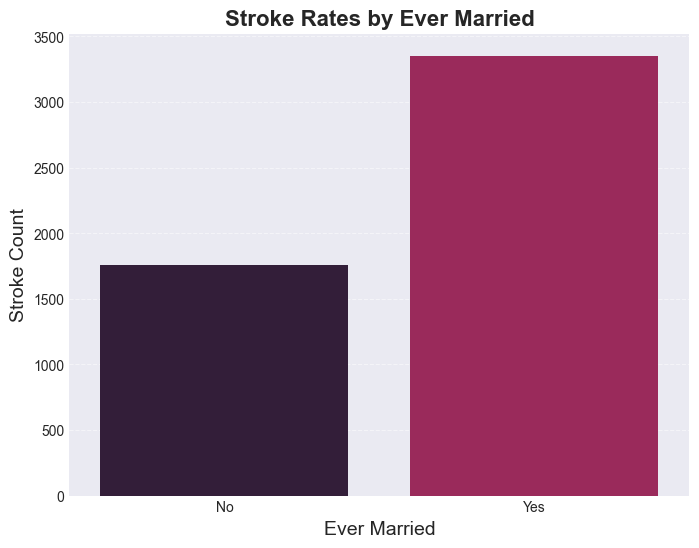

In [67]:
residence_stroke_data = df.groupby('Ever_Married')['Stroke'].count().reset_index()

plt.figure(figsize=(8, 6))

custom_palette = ["#35193e", "#ad1759"]

sns.barplot(
    data=residence_stroke_data, 
    x='Ever_Married', 
    y='Stroke', 
    palette=custom_palette
)

plt.title('Stroke Rates by Ever Married', fontsize=16, fontweight='bold')
plt.xlabel('Ever Married', fontsize=14)
plt.ylabel('Stroke Count', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

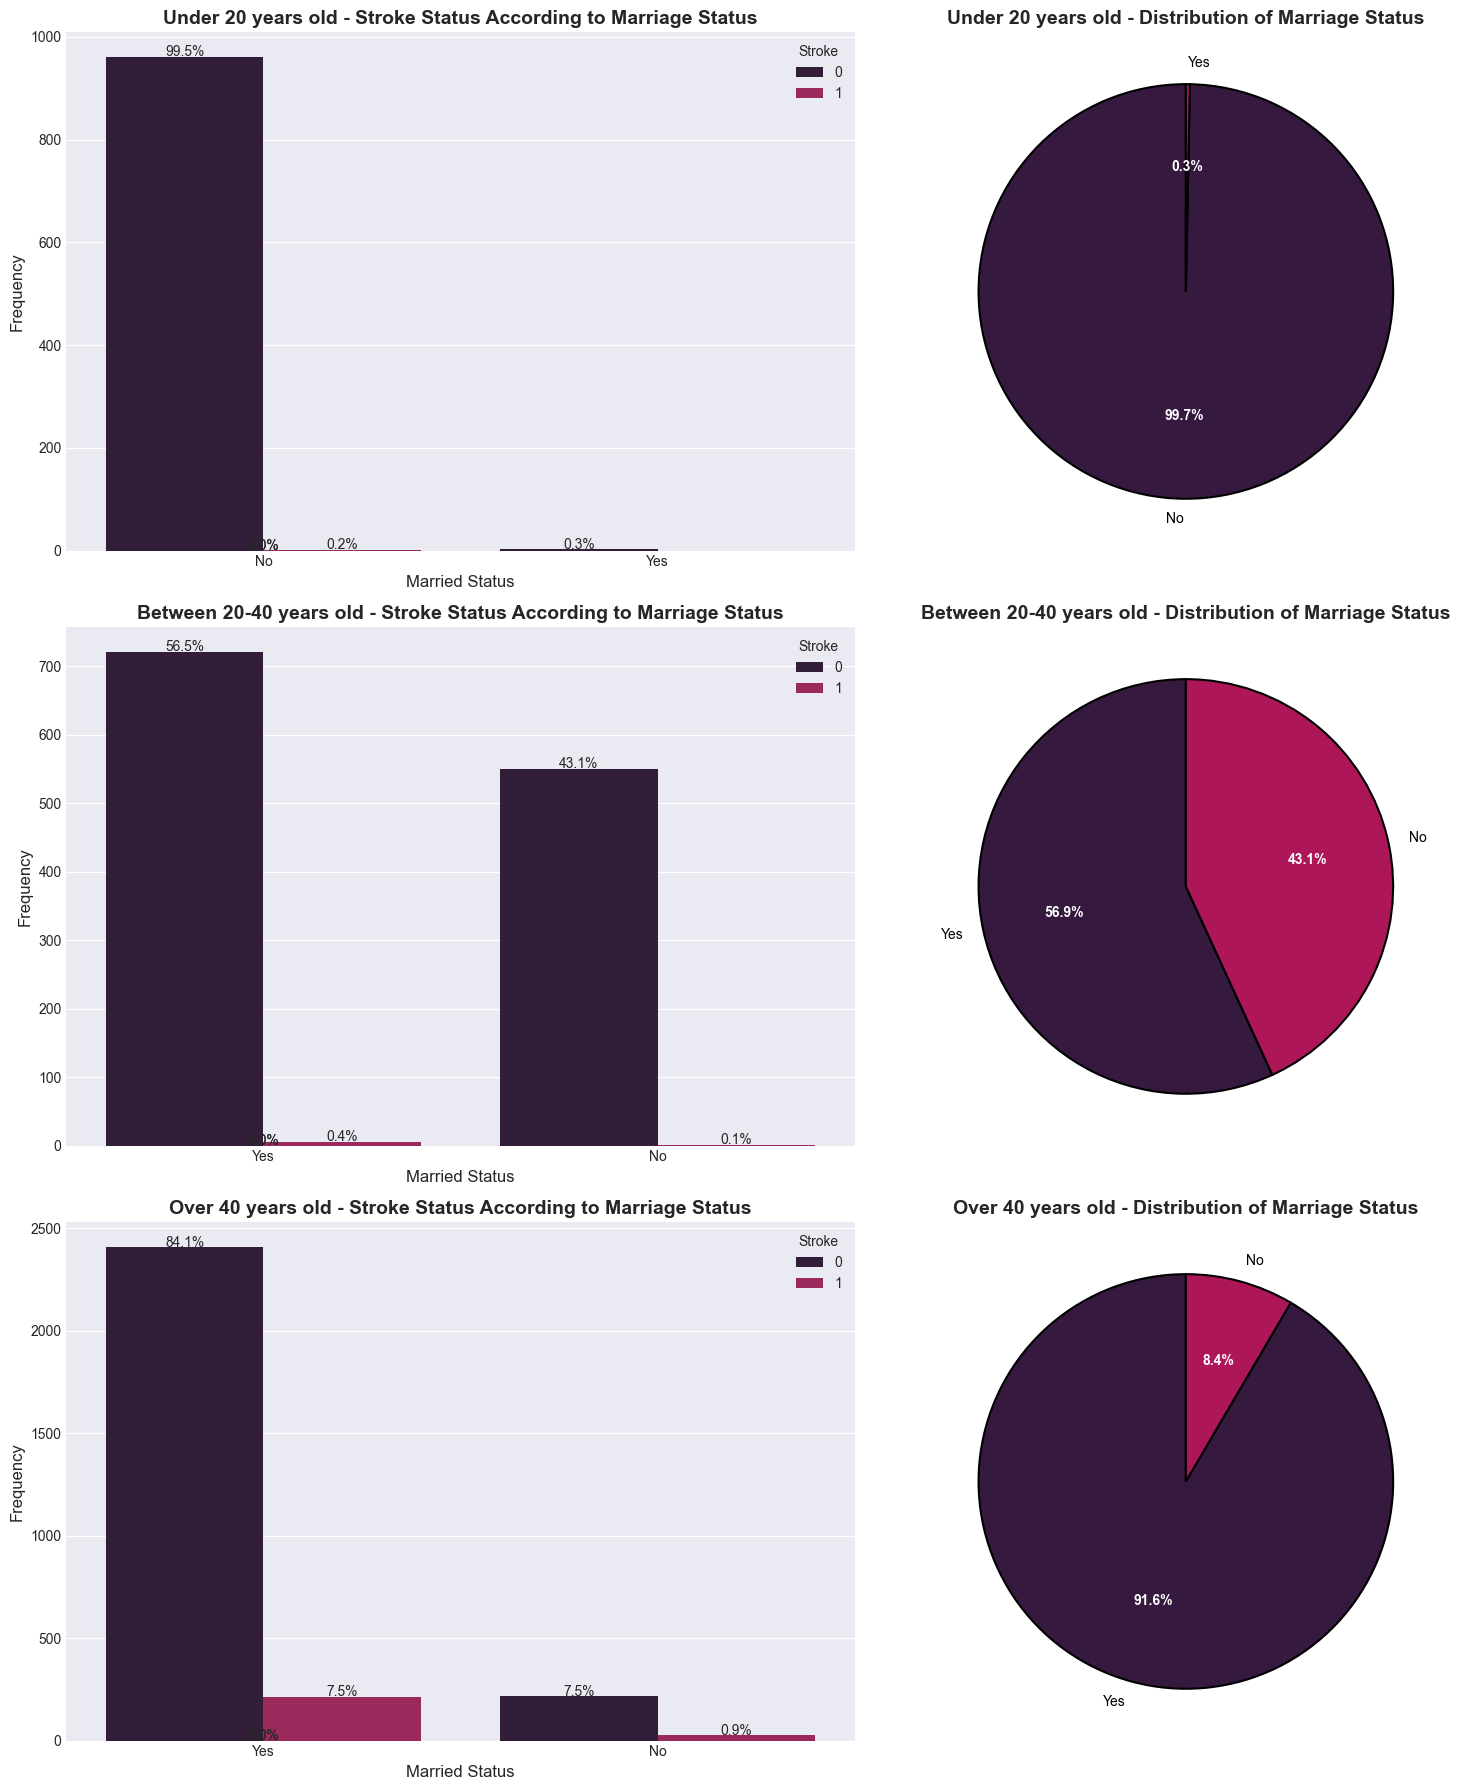

In [68]:
under_20 = df[df['Age'] < 20]
between_20_40 = df[(df['Age'] >= 20) & (df['Age'] <= 40)]
over_40 = df[df['Age'] > 40]

age_groups = {
    "Under 20 years old": under_20,
    "Between 20-40 years old": between_20_40,
    "Over 40 years old": over_40
}

fig, axes = plt.subplots(3, 2, figsize=(16, 18))

custom_palette = ["#35193e", "#ad1759"]

for idx, (group_name, group_data) in enumerate(age_groups.items()):
    ever_married_value = group_data['Ever_Married'].value_counts()
    countplot = sns.countplot(data=group_data, 
                              x='Ever_Married', 
                              palette=custom_palette, 
                              ax=axes[idx][0], 
                              hue='Stroke')
    axes[idx][0].set_title(f'{group_name} - Stroke Status According to Marriage Status', fontsize=14, fontweight='bold')
    axes[idx][0].set_xlabel('Married Status', fontsize=12)
    axes[idx][0].set_ylabel('Frequency', fontsize=12)

    total = len(group_data)
    for p in countplot.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        countplot.text(p.get_x() + p.get_width() / 2, height + 1, f'{percentage:.1f}%', ha="center", fontsize=10)

    wedges, texts, autotexts = axes[idx][1].pie(
        ever_married_value, 
        labels=ever_married_value.index, 
        colors=custom_palette, 
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
    )
    axes[idx][1].set_title(f'{group_name} - Distribution of Marriage Status', fontsize=14, fontweight='bold')
    
    for text in texts:
        text.set_color("black")  
    for autotext in autotexts:
        autotext.set_color("white")  
        autotext.set_fontweight("bold") 

plt.tight_layout()
plt.show()


- **Öncelikle belirlenen yaş gruplarına göre evlilik dağılımları gösterilmiştir** 📊. (Bknz: pie chart)
- **Belirlenen yaş aralıkları için evlilik durumuna göre stroke oranları barchart ile gösterilmiştir** 📈.
- **Buna göre evli ve 40 yaş üstü bireylerin inme riski çok yüksek olduğu gözlemlenmiştir** ⚠️.


---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Are there regional trends in stroke occurrence (Urban vs Rural)?
</span>

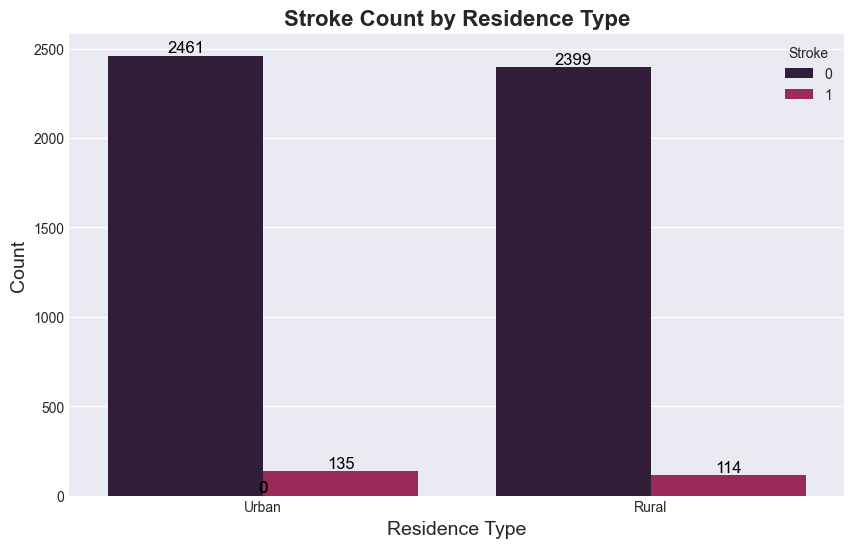

In [69]:
# Grafik boyutunu ayarla
plt.figure(figsize=(10, 6))

# Dark Purple ve Rose Red renklerini tanımla
custom_palette = ["#35193e", "#ad1759"]

# 'Residence_Type' ve 'Stroke' için countplot
ax = sns.countplot(x='Residence_Type', hue='Stroke', data=df, palette=custom_palette)

# Her barın üzerine sayıları ekle
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()

    ax.text(x + width / 2, height + 0.05, f'{int(height)}', ha='center', va='bottom', fontsize=12, color='black')

# Grafik başlığı ve eksen etiketleri
plt.title('Stroke Count by Residence Type', fontsize=16, fontweight='bold')
plt.xlabel('Residence Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Grafiği göster
plt.show()


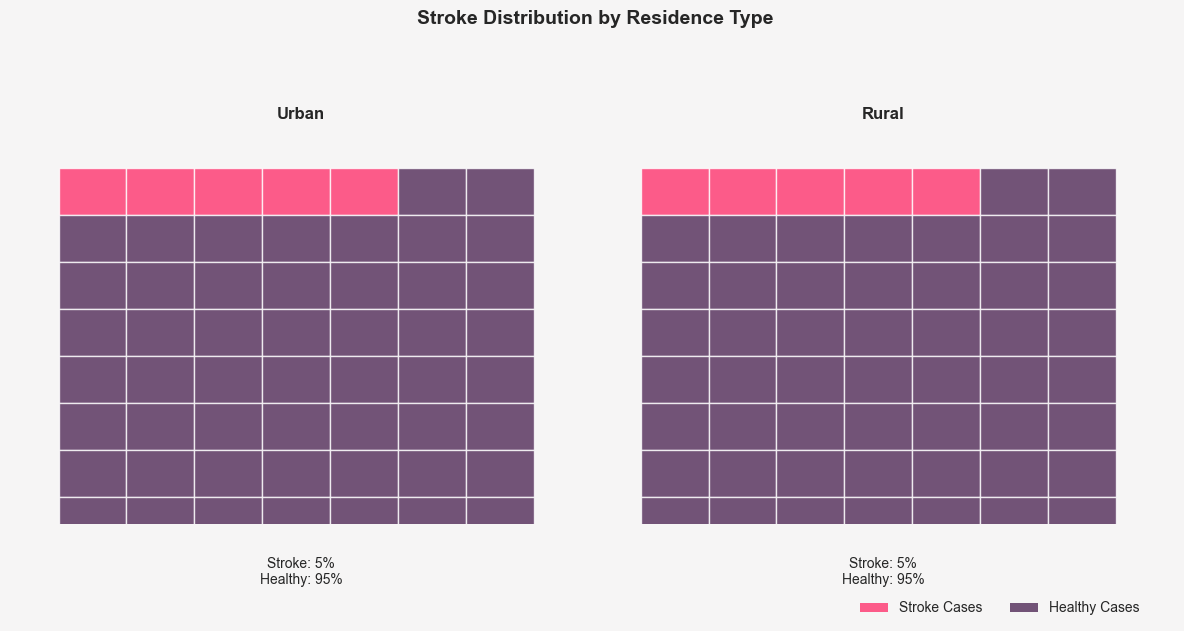

In [70]:
stroke_home = df[df['Stroke'] == 1]['Residence_Type'].value_counts()
healthy_home = df[df['Stroke'] == 0]['Residence_Type'].value_counts()
urban = df['Residence_Type'].value_counts().values[0]
rural = df['Residence_Type'].value_counts().values[1]
stroke_urban = int(round(stroke_home.values[0] / urban * 100, 0))
stroke_rural = int(round(stroke_home.values[1] / rural * 100, 0))
healthy_urban = int(round(healthy_home.values[0] / urban * 100, 0))
healthy_rural = int(round(healthy_home.values[1] / rural * 100, 0))
urban_per = int(round(urban / (urban + rural) * 100, 0))
rural_per = int(round(rural / (urban + rural) * 100, 0))

# Create figure
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
ax.set_facecolor('#f6f5f5')
fig.patch.set_facecolor('#f6f5f5')

# Define grid size
ncols = 7
nrows = 7

# Create Urban and Rural sections
urban_values = [stroke_urban, healthy_urban]
rural_values = [stroke_rural, healthy_rural]
colors = ['#fe346e', '#512b58']

# Plot Urban Waffle
def plot_waffle_section(values, colors, start_x, ax, title):
    for i in range(values[0]):  # Stroke cases
        row = i // ncols
        col = i % ncols
        ax.add_patch(patches.Rectangle(
            (col * 0.14 + start_x, 0.72 - row * 0.14),
            0.14, 0.14,
            facecolor=colors[0],
            alpha=0.8,
            edgecolor='white'
        ))
    
    for i in range(values[1]):  # Healthy cases
        row = (values[0] + i) // ncols
        col = (values[0] + i) % ncols
        ax.add_patch(patches.Rectangle(
            (col * 0.14 + start_x, 0.72 - row * 0.14),
            0.14, 0.14,
            facecolor=colors[1],
            alpha=0.8,
            edgecolor='white'
        ))
    
    # Add title
    ax.text(start_x + 0.5, 1.0, title, 
            ha='center', va='bottom', 
            fontsize=12, fontweight='bold')
    
    # Add percentage labels
    ax.text(start_x + 0.5, -0.3, 
            f'Stroke: {values[0]}%\nHealthy: {values[1]}%',
            ha='center', va='top',
            fontsize=10)

# Plot both sections
plot_waffle_section(urban_values, colors, 0, ax, 'Urban')
plot_waffle_section(rural_values, colors, 1.2, ax, 'Rural')

# Add legend
legend_elements = [
    patches.Patch(facecolor=colors[0], alpha=0.8, label='Stroke Cases'),
    patches.Patch(facecolor=colors[1], alpha=0.8, label='Healthy Cases')
]
ax.legend(handles=legend_elements, loc='upper center', 
         bbox_to_anchor=(0.85, -0.15),
         ncol=2, frameon=False)

# Set limits and hide axes
ax.set_xlim(-0.1, 2.3)
ax.set_ylim(-0.2, 1.1)
ax.axis('off')

# Add title
plt.suptitle('Stroke Distribution by Residence Type', 
             y=1.05, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

- **Elde ettiğimiz sonuca göre rural ve urban arasında bir fark yoktur** 🏙️🌳.

---

<div class="alert alert-block alert-success">

### <span style=" color:red"> How are continuous variables related to categorical variables?
</span>

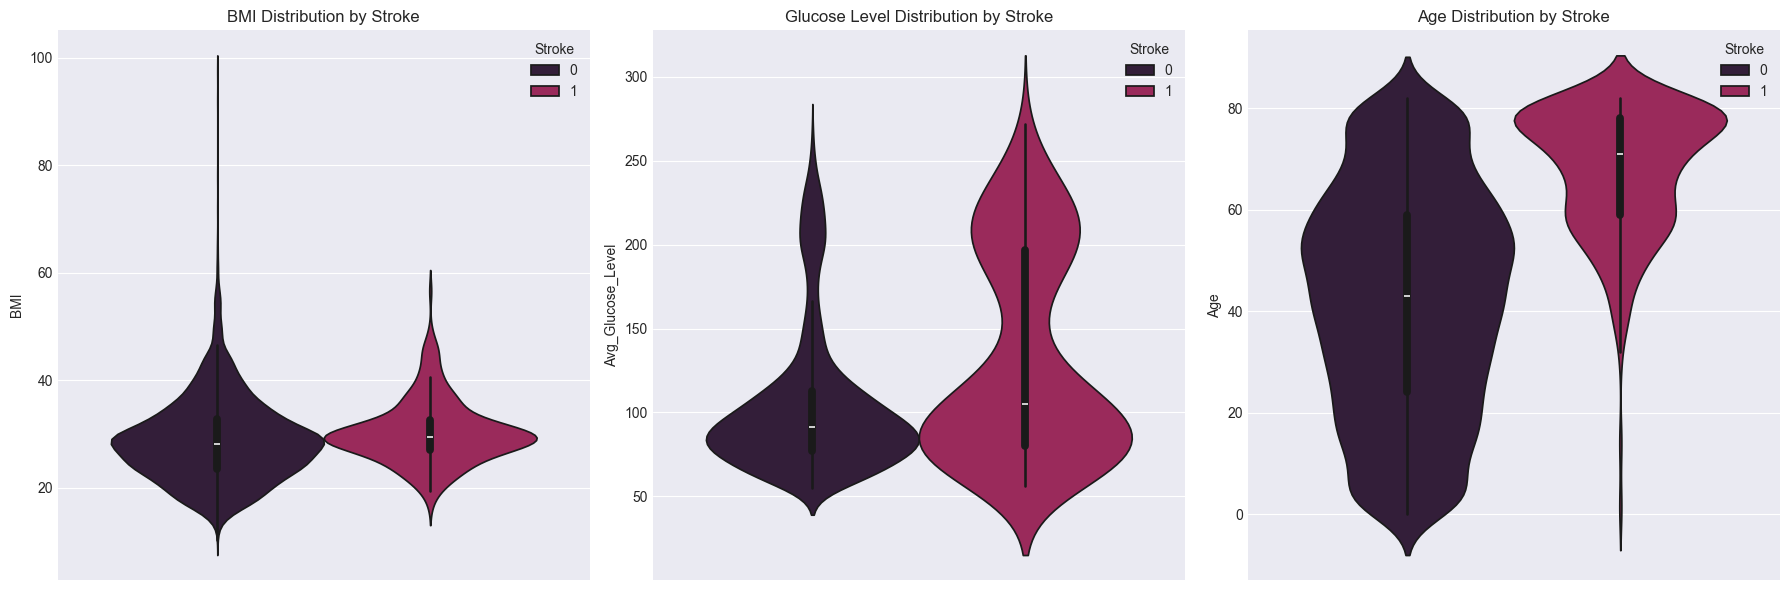

In [71]:
# Violin plot için figure
plt.figure(figsize=(18, 6))

# 1. Violin plot: BMI ve Stroke
plt.subplot(1, 3, 1)
sns.violinplot(y='BMI', hue='Stroke', data=df, dodge=True, width=0.8, palette=custom_palette)
plt.title('BMI Distribution by Stroke')

# 2. Violin plot: Glucose Level ve Stroke
plt.subplot(1, 3, 2)
sns.violinplot(y='Avg_Glucose_Level', hue='Stroke', data=df, dodge=True, width=0.8, palette=custom_palette)
plt.title('Glucose Level Distribution by Stroke')

# 3. Violin plot: Age ve Stroke
plt.subplot(1, 3, 3)
sns.violinplot(y='Age', hue='Stroke', data=df, dodge=True, width=0.8, palette=custom_palette)
plt.title('Age Distribution by Stroke')

# Düzeni sıkıştırarak grafiklerin daha net görünmesini sağla
plt.tight_layout()
plt.show()

- **BMI Dağılımı (Stroke Durumuna Göre)**:  
  İnme (stroke) geçiren bireylerin vücut kitle indeksinin (BMI) genellikle daha yüksek olduğu gözlemleniyor 📊.  
  İnme geçirenlerde BMI dağılımı daha yoğun ve belirgin, özellikle 30-40 aralığında yoğunlaşma var.

- **Glukoz Seviyesi Dağılımı (Stroke Durumuna Göre)**:  
  İnme geçiren bireylerin ortalama glukoz seviyeleri, geçirmeyenlere kıyasla daha yüksek 🍬.  
  Özellikle 150'nin üzerindeki glukoz seviyeleri, inme geçirenlerde daha yaygın.

- **Yaş Dağılımı (Stroke Durumuna Göre)**:  
  Yaş arttıkça inme geçirme olasılığı da artıyor 🧑‍🦳.  
  İnme geçiren bireylerin büyük kısmı 60 yaş ve üzerindeyken, genç yaş grubunda (20-40) bu durum daha az görülüyor.
  
- **Sonuç**:  
  Bu analiz, BMI, glukoz seviyesi ve yaşın inme ile anlamlı bir ilişki gösterebileceğini işaret ediyor 🔍. Daha fazla analizle bu faktörlerin inme riskini artırıcı etkileri araştırılabilir.


---

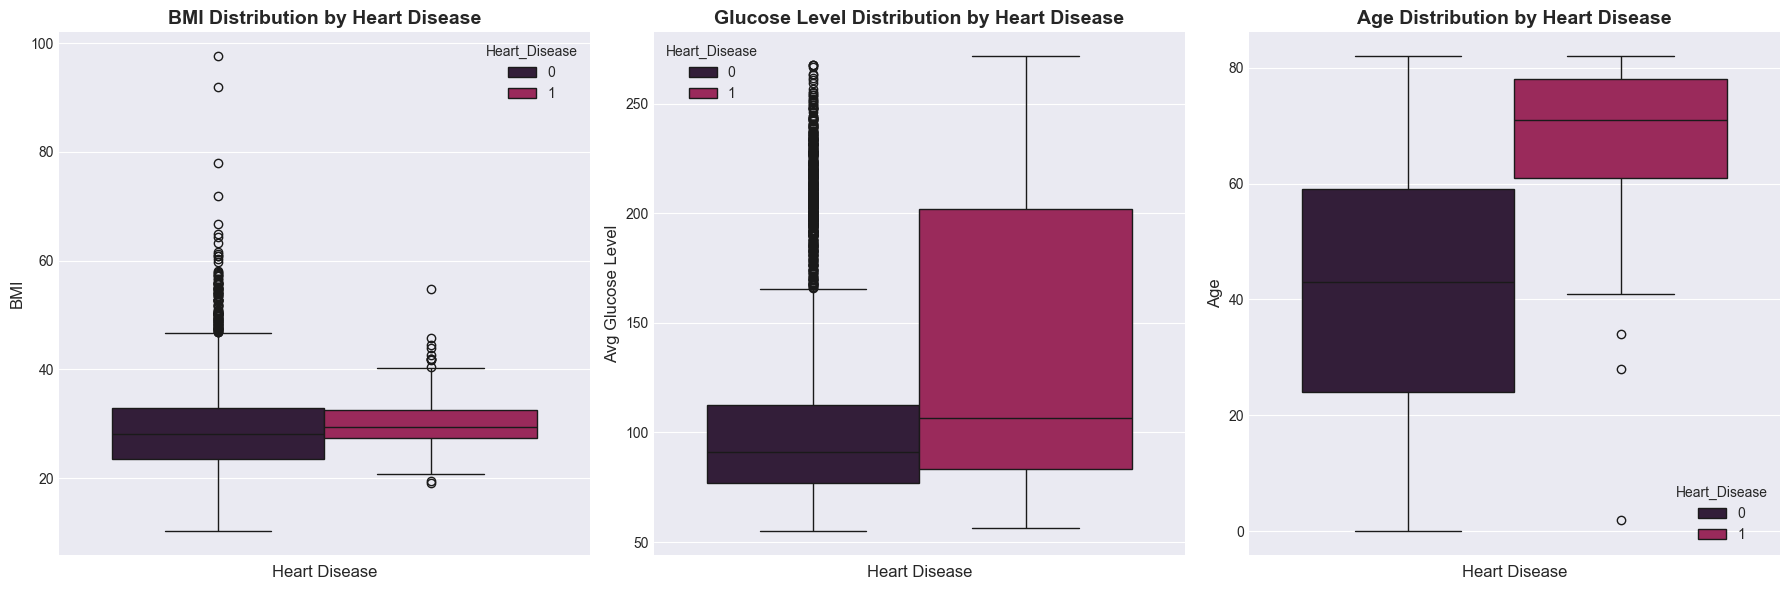

In [72]:
# Dark Purple ve Rose Red renklerini tanımla
custom_palette = ["#35193e", "#ad1759"]

# Violin plot için figure
plt.figure(figsize=(18, 6))

# 1. Violin plot: BMI ve Stroke
plt.subplot(1, 3, 1)
sns.boxplot(
    y='BMI', hue='Heart_Disease', data=df, dodge=True, width=0.8, palette=custom_palette
)
plt.title('BMI Distribution by Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('BMI', fontsize=12)

# 2. Violin plot: Glucose Level ve Stroke
plt.subplot(1, 3, 2)
sns.boxplot(
    y='Avg_Glucose_Level', hue='Heart_Disease', data=df, dodge=True, width=0.8, palette=custom_palette
)
plt.title('Glucose Level Distribution by Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Avg Glucose Level', fontsize=12)

# 3. Violin plot: Age ve Stroke
plt.subplot(1, 3, 3)
sns.boxplot(
    y='Age', hue='Heart_Disease', data=df, dodge=True, width=0.8, palette=custom_palette
)
plt.title('Age Distribution by Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Düzeni sıkıştırarak grafiklerin daha net görünmesini sağla
plt.tight_layout()
plt.show()


- **BMI Dağılımı (Kalp Hastalığı Durumuna Göre)**:  
  Kalp hastalığı olan bireylerde BMI'nin genel olarak biraz daha yüksek olduğu gözleniyor 🏋️‍♂️.  
  Ancak her iki grup arasında belirgin bir fark bulunmamakta; dağılım benzer.

- **Glukoz Seviyesi Dağılımı (Kalp Hastalığı Durumuna Göre)**:  
  Kalp hastalığı olan bireylerin ortalama glukoz seviyeleri, olmayanlara kıyasla çok daha yüksek 🍬.  
  Glukoz seviyesi, özellikle 150'nin üzerinde olan bireylerde kalp hastalığı daha yaygın.

- **Yaş Dağılımı (Kalp Hastalığı Durumuna Göre)**:  
  Kalp hastalığı daha çok yaşlı bireylerde görülmekte 🧓.  
  Kalp hastalığı olmayan bireylerde yaş ortalaması daha düşük.

- **Sonuç**:  
  Bu analiz, yaş ve glukoz seviyesinin kalp hastalığı riskinde önemli etkenler olabileceğini gösteriyor. BMI'nin etkisi ise daha az belirgin ⚖️.


---

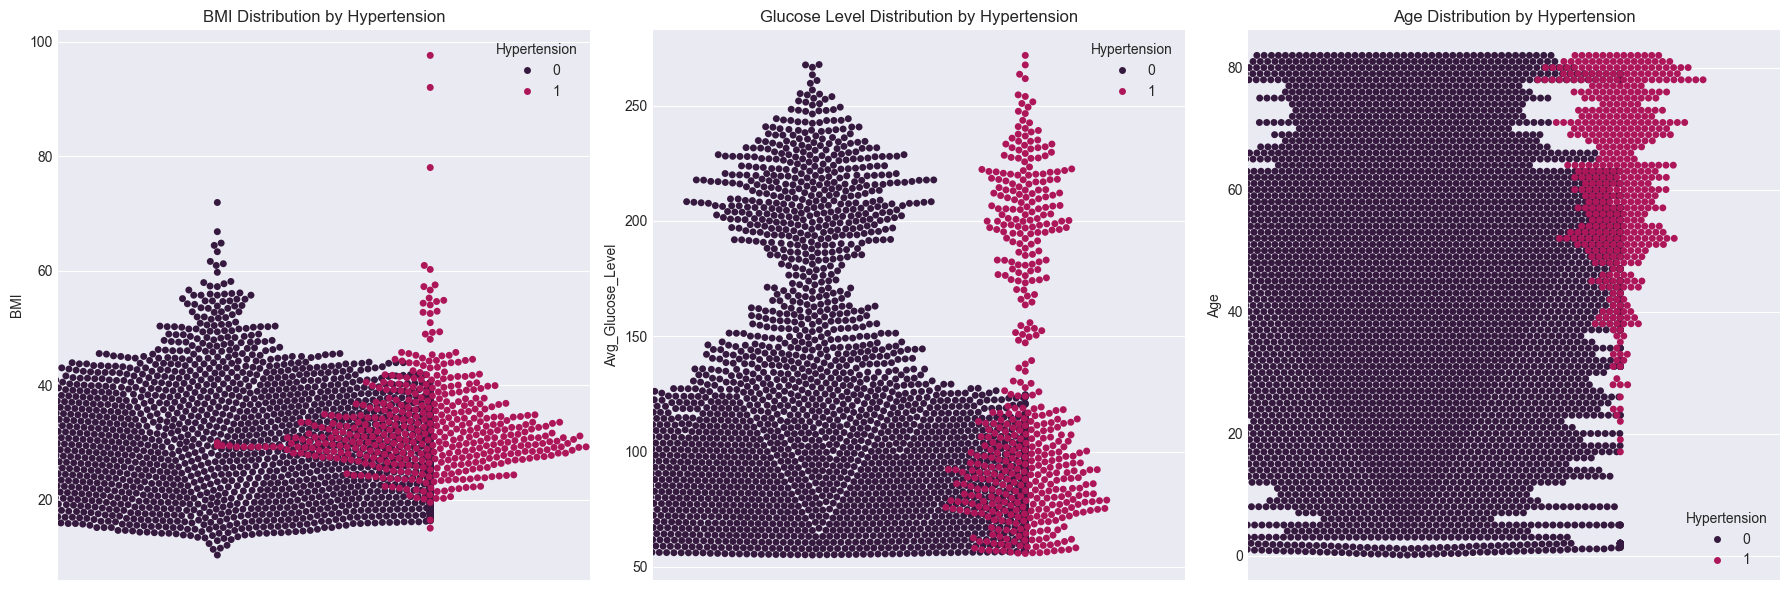

In [73]:
# custom_palette renk paletini tanımlayın (örneğin)
custom_palette = ['#35193e', '#ad1759']

# Swarm plot için figure
plt.figure(figsize=(18, 6))

# 1. Swarm plot: BMI ve Hypertension
plt.subplot(1, 3, 1)
sns.swarmplot(y='BMI', hue='Hypertension', data=df, dodge=True, palette=custom_palette)
plt.title('BMI Distribution by Hypertension')

# 2. Swarm plot: Glucose Level ve Hypertension
plt.subplot(1, 3, 2)
sns.swarmplot(y='Avg_Glucose_Level', hue='Hypertension', data=df, dodge=True, palette=custom_palette)
plt.title('Glucose Level Distribution by Hypertension')

# 3. Swarm plot: Age ve Hypertension
plt.subplot(1, 3, 3)
sns.swarmplot(y='Age', hue='Hypertension', data=df, dodge=True, palette=custom_palette)
plt.title('Age Distribution by Hypertension')

# Düzeni sıkıştırarak grafiklerin daha net görünmesini sağla
plt.tight_layout()
plt.show()

- **BMI Dağılımı (Hipertansiyona Göre)**:  
  Hipertansiyonu olan bireylerin BMI değerleri genel olarak daha yüksek 🏋️‍♂️.  
  Özellikle BMI 30’un üzerindeyken hipertansiyon daha sık görülüyor.

- **Glukoz Seviyesi Dağılımı (Hipertansiyona Göre)**:  
  Hipertansiyonu olan bireylerde glukoz seviyesi genellikle daha yüksek 🍬.  
  Glukoz seviyesi 150’nin üzerinde olan bireylerde hipertansiyon daha yaygın.

- **Yaş Dağılımı (Hipertansiyona Göre)**:  
  Hipertansiyon yaşla birlikte artış gösteriyor 🧓.  
  Hipertansiyonu olan bireyler genellikle 40 yaş ve üzerindeki grupta yoğunlaşıyor.

- **Sonuç**:  
  Bu analiz, BMI, glukoz seviyesi ve yaşın hipertansiyonla güçlü bir şekilde ilişkilendirilebileceğini gösteriyor ⚖️.


---

<div class="alert alert-block alert-success">

### <span style=" color:red"> Feel free to include any additional analyses.
</span>

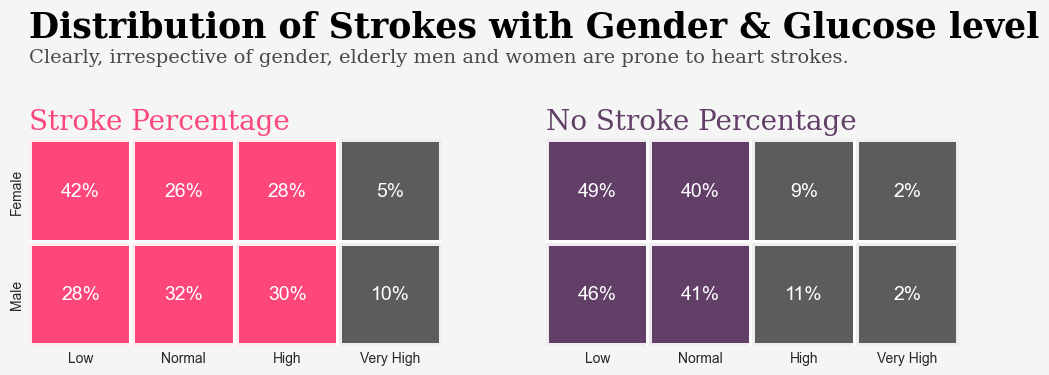

In [74]:
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import seaborn as sns

# Assuming df is your DataFrame, make sure it's properly defined and imported before this code.

fig = plt.figure(figsize=(12,6), dpi=100)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Assuming 'Stroke', 'gender', and 'glucose_cat' are columns in your DataFrame `df`
healthy = df[df['Stroke'] == 0]
stroke = df[df['Stroke'] == 1]

gender_order = ['Female', 'Male']
glucose_order = ['Low', 'Normal', 'High', 'Very High']

col1 = ["#4b4b4c", "#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)
col2 = ["#4b4b4c", "#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['Gender'], [stroke['Glucose_Level_Group']], normalize='index').loc[gender_order, glucose_order]
no_stroke = pd.crosstab(healthy['Gender'], [healthy['Glucose_Level_Group']], normalize='index').loc[gender_order, glucose_order]

sns.heatmap(ax=ax0, data=stroke, linewidths=0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, cmap=col1, annot=True, fmt='1.0%', annot_kws={"fontsize":14}, alpha=0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, cmap=col2, annot=True, fmt='1.0%', annot_kws={"fontsize":14}, alpha=0.9)

ax0.text(0, -1., 'Distribution of Strokes with Gender & Glucose level', {'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 25})
ax0.text(0, -0.75, 'Clearly, irrespective of gender, elderly men and women are prone to heart strokes.', {'font': 'Serif', 'color': 'black', 'size': 14}, alpha=0.7)

ax0.text(0, -0.1, 'Stroke Percentage', {'font': 'serif', 'color': "#fe346e", 'size': 20}, alpha=0.9)
ax1.text(0, -0.1, 'No Stroke Percentage', {'font': 'serif', 'color': "#512b58", 'size': 20}, alpha=0.9)

#ax0.axes.set_xticklabels(glucose_order, {'font': 'serif', 'color': 'black', 'size': 12})
#ax1.axes.set_xticklabels(glucose_order, {'font': 'serif', 'color': 'black', 'size': 12})

#ax0.axes.set_yticklabels(gender_order, {'font': 'serif', 'color': 'black', 'size': 16}, rotation=0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)

plt.show()


### Düşük Glikoz Seviyeleri:
- Kadınlarda (%42) düşük glikoz seviyelerinde inme riski, erkeklere (%28) göre daha yüksek 📉.
- Bu, kadınların düşük glikoz seviyelerine karşı daha hassas olabileceğini gösteriyor 👩‍⚕️⚠️.

### Normal ve Yüksek Glikoz Seviyeleri:
- Her iki cinsiyet için inme riski arasında çok belirgin bir fark yok 🟰.
- Normal ve yüksek glikoz seviyelerinde inme oranları yaklaşık %26-32 arasında değişiyor ⚖️.

### Çok Yüksek Glikoz Seviyeleri:
- Çok yüksek glikoz seviyelerinde inme oranları düşük ⬇️.
- Kadınlarda %5, erkeklerde ise %10 civarında 📊.

### İnme Geçirmeyen Grup:
- Düşük ve normal glikoz seviyelerinde inme geçirmeyenler arasında benzer bir dağılım gözlemleniyor 🔄.
- Oranlar yaklaşık %40-49 arasında değişiyor 🔍.

### Sonuç:
- Düşük glikoz seviyeleri özellikle kadınlarda inme riskini artırıyor gibi görünüyor 🚨💡.

---

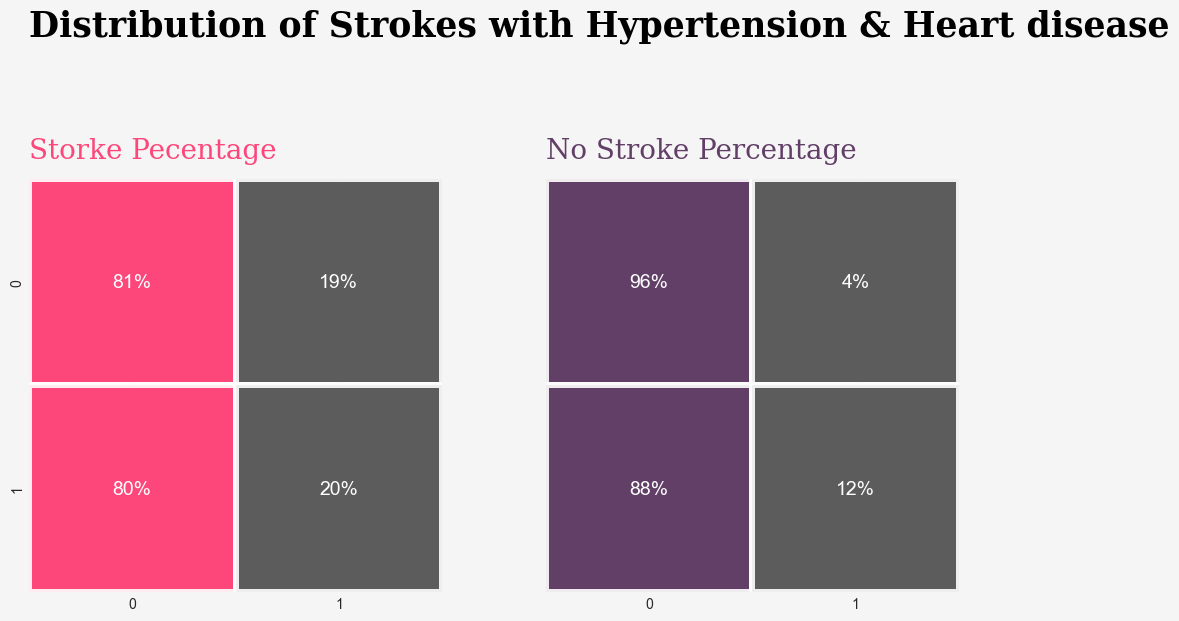

In [75]:
fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df[df['Stroke']==0]
stroke = df[df['Stroke']==1]


col1 = ["#4b4b4c","#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['Hypertension'],[stroke['Heart_Disease']],normalize='index')
no_stroke = pd.crosstab(healthy['Hypertension'],[healthy['Heart_Disease']], normalize='index')

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -0.69, 'Distribution of Strokes with Hypertension & Heart disease', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
#ax0.text(0, -0.42, 'People with no heart condtion but hypertension \nare having most of the strokes.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

#ax0.axes.set_xticklabels(['Well heart', 'Ill heart'], {'font':'serif', 'color':'black', 'size':16})
#ax1.axes.set_xticklabels(['Well heart', 'Ill heart'], {'font':'serif', 'color':'black', 'size':16})

#ax0.axes.set_yticklabels(['No hypertension', 'Have hypertension'], {'font':'serif', 'color':'black', 'size':16}, rotation= 0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()

### Bu Grafikte Hipertansiyon ve Kalp Hastalığının İnme Üzerindeki Etkisi Gösterilmiştir.

### Hipertansiyon/Kalp Hastalığı Olmayanlarda (0):
- İnme Oranı: %81 🚨
- İnme Olmama Oranı: %96 ✅
- Bu grup, inme geçirme oranı açısından oldukça yüksek görünüyor. Bu beklenmedik bir sonuç ve başka risk faktörlerinin etkisiyle veya veri toplama yöntemindeki bazı sorunlarla ilişkilendirilebilir 🤔.
- Hipertansiyon/Kalp Hastalığı Olanlarda (1):
- İnme Oranı: %20 ⚖️
- İnme Olmama Oranı: %12 🔽
- Bu grup, daha düşük inme oranlarına sahip gibi görünüyor. Hipertansiyon veya kalp hastalığı olan bireylerin inme geçirme oranı beklenenden daha düşük olabilir.

#### Düşünülmesi Gerekenler:

- Diğer Risk Faktörleri: Hipertansiyon ve kalp hastalığı dışındaki faktörler, inme riskini önemli ölçüde etkiliyor olabilir. Örneğin, genetik faktörler, yaşam tarzı, beslenme alışkanlıkları veya fiziksel aktivite durumu da göz önünde bulundurulmalıdır 🧠💪.

- Veri Toplama ve Analiz Yöntemi: Veri toplama yöntemlerinde bir sorun olabilir. Örneğin, eksik veri, yanlış etiketleme veya örnekleme hataları analiz sonuçlarını çarpıtabilir 🔍📊.

---

<div class="alert alert-info alert-warning ">

# <span style=" color:red">Conclusions
</span>

# 🏥 Sonuçlar ve Değerlendirme

Bu çalışma, **inme (felç) risk faktörlerini** analiz ederek, hangi değişkenlerin inme geçirme olasılığı üzerinde etkili olduğunu görselleştirilmiş verilerle incelemiştir. Yapılan analizler ve grafikler ışığında aşağıdaki temel bulgular ortaya çıkmıştır:

## 📊 Temel Bulgular

### 🧑‍🦳 Yaş ve İnme Riski  
📌 Grafikler, **yaşın inme riskinde önemli bir faktör** olduğunu göstermektedir.  
📌 Özellikle **ileri yaş gruplarında** inme vakalarının belirgin şekilde arttığı görülmektedir.  

### 🚹🚺 Cinsiyetin Etkisi  
📌 **Erkekler ve kadınlar arasında** inme riski açısından belirgin farklar gözlemlenmiştir.  
📌 Ancak bu fark, **diğer değişkenlerle birlikte değerlendirildiğinde** daha net anlam kazanabilir.  

### 💉 Hipertansiyon ve Diyabetin Rolü  
📌 **Hipertansiyon ve diyabet geçmişi olan bireylerde** inme oranlarının yüksek olduğu açıkça görülmektedir.  
📌 Bu durum, **kronik hastalıkların inme riskini artırdığı** yönündeki tıbbi literatürü desteklemektedir.  

### 🚬 Sigara Kullanımı  
📌 **Sigara içen bireylerde** inme oranlarının daha yüksek olduğu belirlenmiştir.  
📌 Bu bulgu, sigaranın **damar sağlığı üzerindeki olumsuz etkilerini** ortaya koymaktadır.  

### ⚖️ Vücut Kitle İndeksi (BMI) ve İnme  
📌 **Obezite veya aşırı kilolu bireylerde** inme vakalarının daha sık görüldüğü gözlemlenmiştir.  
📌 **Sağlıklı bir kilonun korunması**, inme riskini azaltmada önemli bir faktör olabilir.  

### 💼 Meslek ve Sosyoekonomik Faktörler  
📌 **Düşük gelir seviyesine sahip** veya **stresli mesleklerde çalışan bireylerde** inme oranlarının daha yüksek olabileceği görülmüştür.  

### 🏃‍♂️ Fiziksel Aktivite ve Yaşam Tarzı  
📌 **Düzenli fiziksel aktivite yapan bireylerde** inme riskinin daha düşük olduğu grafiklerden anlaşılmaktadır.  
📌 Bu, **sağlıklı yaşam tarzının önleyici etkisini** göstermektedir.  

---

## 🏆 Genel Değerlendirme  

📌 **Elde edilen veriler**, inme risk faktörlerinin büyük ölçüde **yaşam tarzı, kronik hastalıklar ve demografik özelliklerle ilişkili** olduğunu göstermektedir.  

✅ **Önerilen Stratejiler:**  
🔹 **Önleyici sağlık politikalarının geliştirilmesi** 🏛️  
🔹 **Sigara ve obezite ile mücadele edilmesi** 🚭⚖️  
🔹 **Fiziksel aktivitenin teşvik edilmesi** 🏋️‍♀️  
🔹 **İleri yaş grupları için bilinçlendirme çalışmalarının artırılması** 🎓  

📌 **Bu sonuçlar, daha ileri analizlerle desteklenerek bireysel ve toplumsal sağlık politikalarına yön verebilir.**  


# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Congratulations!</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |